# Mental Health Survey Analysis in Tech Companies

# Analytic Questions

* **AQ1**: Is there a significant difference between the mental health of employees across the attribute of gender? 
* **AQ2**: Is there a significant difference between the mental health of employees across the attribute of age? 
* **AQ3**: Do more supportive companies have healthier employees mentally? 
* **AQ4**: Does the attitude of individuals toward mental health influence their mental health and their seeking of treatments?



# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# 1. Integrating the Data Sources

In [2]:
# Integrating the 5 datasets into one dataset.

# loading data

df_2016 = pd.read_csv('./data/2016.csv')
df_2017 = pd.read_csv('./data/2017.csv')
df_2018 = pd.read_csv('./data/2018.csv')
df_2019 = pd.read_csv('./data/2019.csv')
df_2020 = pd.read_csv('./data/2020.csv')



In [3]:
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)
print(df_2020.shape)

(1433, 63)
(756, 123)
(417, 123)
(352, 82)
(180, 120)


dataset of 2017 and 2018 have the highest number of attributes

# 2. Data Cleaning

In [4]:
# removing HTML tags from Columns indexes
import re

def html_remover(data):
    new_cols = []
    for cols in data.columns:
        new_cols.append(re.sub(r'<.*?>', '', cols))

    s = pd.Series(new_cols)
    data.columns = new_cols
    return data


In [5]:
list_data = [df_2016, df_2017, df_2018, df_2019, df_2020]

for df in list_data:
    df = html_remover(df)

In [6]:
# 1. understanding the common attributes between the 5 datasets
# is there consistent wording between them
# use SequenceMatcher from the difflib module to find attributes that are similar.

from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [7]:
# testing the function 
similar('Clear', 'clearer')

0.6666666666666666

In [8]:
Columns = pd.DataFrame(index= df_2017.columns, columns=['y2016','y2017', 'y2018', 'y2019', 'y2020'])
Columns.y2017 = True

In [9]:
df = [(df_2016, 'y2016'),(df_2017, 'y2017'), (df_2018,'y2018'), (df_2019, 'y2019'), (df_2020,'y2020')]

for data in df:
    for col in data[0].columns:
        for incol in Columns.index:
            if similar(col, incol) > 0.7:
                Columns.at[incol,data[1]] = True
                
Columns[Columns.y2016 & Columns.y2017 & Columns.y2018 & Columns.y2019 & Columns.y2020]

,y2016,y2017,y2018,y2019,y2020
Are you self-employed?,True,True,True,True,True
How many employees does your company or organization have?,True,True,True,True,True
Is your employer primarily a tech company/organization?,True,True,True,True,True
Is your primary role within your company related to tech/IT?,True,True,True,True,True
Does your employer provide mental health benefits as part of healthcare coverage?,True,True,True,True,True
Do you know the options for mental health care available under your employer-provided health coverage?,True,True,True,True,True
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",True,True,True,True,True
Does your employer offer resources to learn more about mental health disorders and options for seeking help?,True,True,True,True,True
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,True,True,True,True,True
"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",True,True,True,True,True


In [10]:
# 2. Only keep the attributes that are relvant to the Analytic questions

Selected_columns = ['Does your employer provide mental health benefits as part of healthcare coverage?',
                    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
                    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
                    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
                    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
                    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
                    'Would you feel comfortable discussing a mental health issue with your coworkers?',
                    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
                    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
                    'How willing would you be to share with friends and family that you have a mental illness?',
                    'What is your age?',
                    'What is your gender?',
                    'What country do you live in?',
                    'What country do you work in?',
                    'Have you ever been diagnosed with a mental health disorder?',
                    'Have you ever sought treatment for a mental health disorder from a mental health professional?']

In [11]:
# if a column in one of the data sources is not one of the selected columns above, this code drops it. 
def dropping_cols(data):
    droping_cols = []
    for col in data.columns:
        maxScore = 0
        for sel_col in Selected_columns:
            if(similar(col,sel_col)>maxScore):
                maxScore = similar(col,sel_col)
        if (maxScore <0.7):
            droping_cols.append(col)
        else:
            if 'previous' in col:
                droping_cols.append(col)
   
    data.drop(columns = droping_cols, inplace=True)
    return data

    

In [12]:
list_data = [df_2016, df_2017, df_2018, df_2019, df_2020]

for df in list_data:
    df = dropping_cols(df)

In [13]:
# renaming columns

# 1. Create a dictionary to map column names

Column_dict = {'SupportQ1': 'Does your employer provide mental health benefits as part of healthcare coverage?',
               'SupportQ2': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
               'SupportQ3': 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
               'SupportQ4': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
               'SupportQ5': 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
               'AttitudeQ1': 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
               'AttitudeQ2': 'Would you feel comfortable discussing a mental health issue with your coworkers?',
               'AttitudeQ3': 'How willing would you be to share with friends and family that you have a mental illness?',
               'SupportEx1': 'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
               'SupportEx2': 'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
               'Age': 'What is your age?',
               'Gender': 'What is your gender?',
               'ResidingCountry': 'What country do you live in?',
               'WorkingCountry': 'What country do you work in?',
               'MentalIlness': 'Have you ever been diagnosed with a mental health disorder?',
               'Treatment' : 'Have you ever sought treatment for a mental health disorder from a mental health professional?'}


In [14]:
for col in df_2016:
    for key in Column_dict:
        if similar(col, Column_dict[key])>0.9:
            df_2016.rename({col:key}, axis='columns', inplace=True)

In [15]:
df_2016.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",AttitudeQ2,AttitudeQ1,"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,AttitudeQ3,Have you been diagnosed with a mental health condition by a medical professional?,Treatment,Age,Gender,ResidingCountry,WorkingCountry
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,0,39,Male,United Kingdom,United Kingdom


In [16]:
df_2016.columns

Index(['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'AttitudeQ2', 'AttitudeQ1',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
       'AttitudeQ3',
       'Have you been diagnosed with a mental health condition by a medical professional?',
       'Treatment', 'Age', 'Gender', 'ResidingCountry', 'WorkingCountry'],
      dtype='object')

In [17]:
Others = {'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'SupportQ5',
         'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?':'SupportEx1',
         'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?':'SupportEx2',
         'Have you been diagnosed with a mental health condition by a medical professional?':'MentalIlness'}
df_2016.rename(Others, axis='columns', inplace=True)
df_2016.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ2,AttitudeQ1,SupportEx1,SupportEx2,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,AttitudeQ3,MentalIlness,Treatment,Age,Gender,ResidingCountry,WorkingCountry
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,0,39,Male,United Kingdom,United Kingdom
1,No,Yes,Yes,Yes,Somewhat easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,1,29,male,United States of America,United States of America
2,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,NaN,NaN,I don't know,Somewhat open,No,1,38,Male,United Kingdom,United Kingdom
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm not sure,I'm not sure,Some of my previous employers,Neutral,Yes,1,43,male,United Kingdom,United Kingdom
4,Yes,No,No,No,Neither easy nor difficult,Maybe,No,NaN,NaN,Some of my previous employers,Somewhat open,Yes,1,43,Female,United States of America,United States of America


In [18]:
df_2016 = df_2016[Column_dict.keys()]
df_2016.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,39,Male,United Kingdom,United Kingdom,Yes,0


In [19]:
# create a function to rename columns
def rename_cols(data):
    
    for col in data:
        for key in Column_dict:
            if similar(col, Column_dict[key])>0.95:
                data.rename({col:key}, axis='columns', inplace=True)
    data = data[Column_dict.keys()]
    return data

In [20]:
# applying the rename_cols() function to the dataframes
list_data = [df_2017, df_2018, df_2019, df_2020]

for df in list_data:
    df = rename_cols(df)

In [21]:
df_2017 = df_2017[Column_dict.keys()]
df_2017.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,No,No,I don't know,I don't know,I don't know,Yes,Yes,5,NaN,NaN,27.0,Female,United Kingdom,United Kingdom,NaN,1


In [22]:
df_2018 = df_2018[Column_dict.keys()]
df_2018.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,3,NaN,NaN,57,Female,Canada,Canada,NaN,1


In [23]:
df_2019 = df_2019[Column_dict.keys()]
df_2019.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,I don't know,Yes,Yes,I don't know,Very easy,Yes,Yes,8,NaN,NaN,25,Male,United States of America,United States of America,NaN,False


In [24]:
df_2020 = df_2020[Column_dict.keys()]
df_2020.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,I'm not sure,45,Male,United States of America,United States of America,NaN,0


In [25]:
# Add the column year to all datasource before combining them all
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020

Column_dict['Year'] = 'The year this data was collected.'

In [26]:
# Integrate the data
integrate_df = pd.concat([df_2016,df_2017,df_2018,df_2019,df_2020])
integrate_df.reset_index(inplace=True, drop=True)

In [27]:
integrate_df.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment,Year
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,39.0,Male,United Kingdom,United Kingdom,Yes,0,2016
1,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,NaN,NaN,29.0,male,United States of America,United States of America,Yes,1,2016
2,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Somewhat open,NaN,NaN,38.0,Male,United Kingdom,United Kingdom,No,1,2016
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,I'm not sure,I'm not sure,43.0,male,United Kingdom,United Kingdom,Yes,1,2016
4,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,NaN,NaN,43.0,Female,United States of America,United States of America,Yes,1,2016


## 2.1 Data Cleaning Level I

In [28]:
for col in integrate_df.columns:
    print(col)
    print(integrate_df[col].unique())
    print('------------------------------------------')
    

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
------------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
------------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
------------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
------------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
------------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
------------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
------------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open' 5 4 10 8 3 6 2 9 7 1 0]
------------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'N

## Clean Gender

<AxesSubplot:>

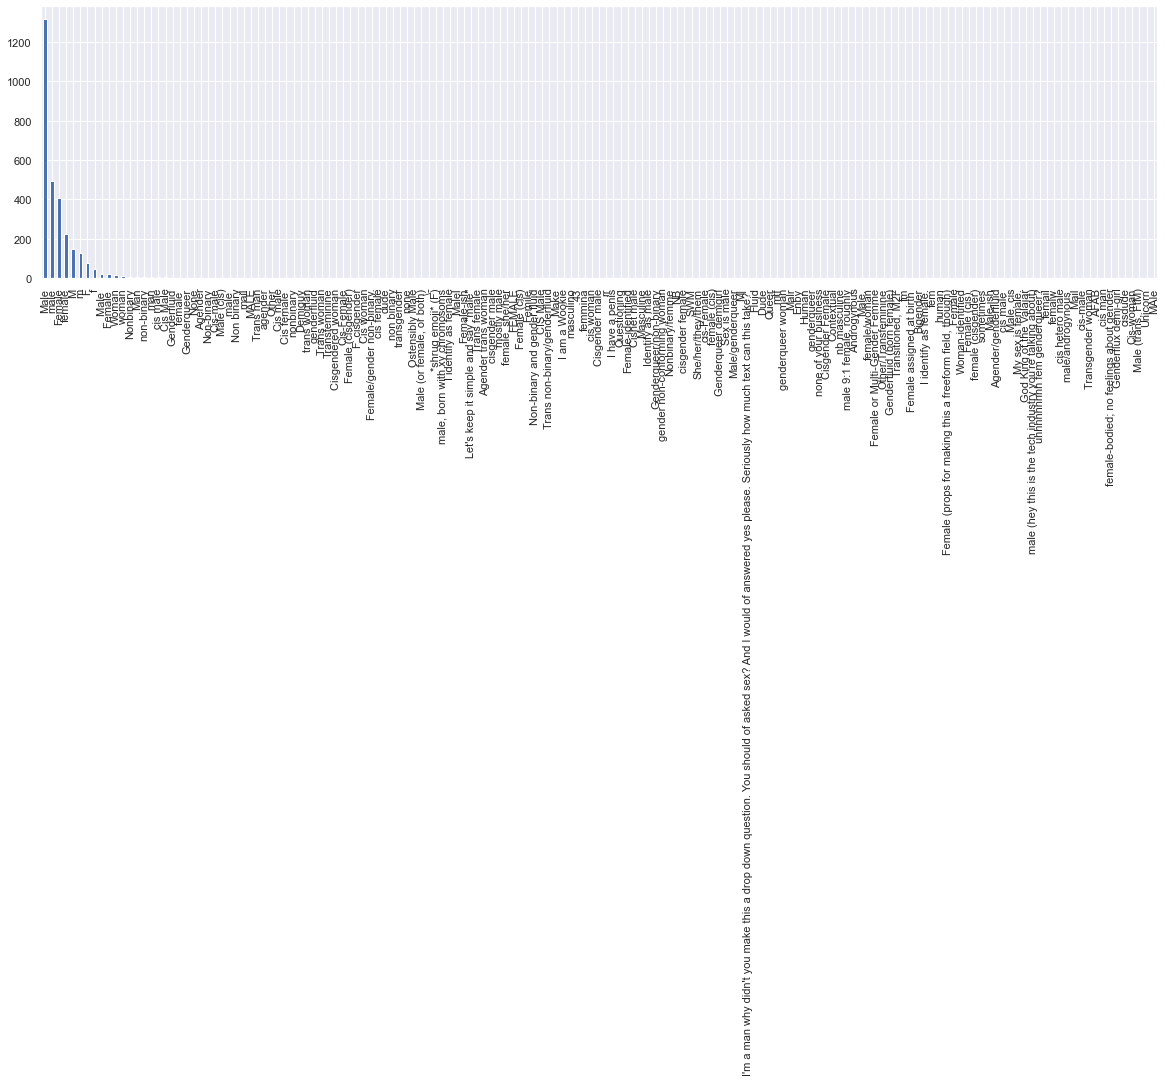

In [29]:
plt.figure(figsize=(20,5))
integrate_df.Gender.value_counts().plot(kind='bar')


In [30]:
integrate_df.Gender.value_counts()

Male                 1316
male                  493
Female                408
female                226
M                     150
                     ... 
cisdude                 1
Cis-woman               1
Male (trans, FtM)       1
Unicorn                 1
MAle                    1
Name: Gender, Length: 157, dtype: int64

In [31]:
# Categorize Gender to 'Male', 'Female', 'Other'

integrate_df.Gender.unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [32]:
rep_dic = {
    'Male':'Male', 
    'male': 'Male', 'Male ':'Male', 'Female':'Female', 'M':'Male', 'female':'Female', 'm':'Male',
       'I identify as female.':'Female', 'female ':'Female', 'Bigender':'Other', 'non-binary':'Other',
       'Female assigned at birth ':'Other', 'F': 'Female', 'Woman':'Female', 'man':'Male', 'fm':'Female', 
    'f':'Female',
       'Cis female ': 'Female', 'Transitioned, M2F': 'Other', 'Genderfluid (born female)':'Other',
       'Other/Transfeminine': 'Other', 'Female or Multi-Gender Femme':'Female', 'Female ':'Female',
       'woman':'Female', 'female/woman':'Female', 'Cis male':'Male', 'Male.':'Male', 'Androgynous':'Other',
       'male 9:1 female, roughly':'Other', 'Male (cis)':'Male', 'Other':'Other',
       'nb masculine':'Other', 'Cisgender Female':'Female', 'Man':'Male', 'Sex is male':'Male',
       'none of your business':'Other', 'genderqueer':'Other', 'cis male':'Male', 'Human':'Other',
       'Genderfluid':'Other', 'Enby':'Other', 'Malr':'Male', 'genderqueer woman': 'Other', 'mtf':'Other', 
    'Queer':'Other',
       'Agender':'Other', 'Dude':'Male', 'Fluid':'Other',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ":'Male',
       'mail':'Male', 'M|':'Male', 'Male/genderqueer':'Other', 'fem':'Female', 'Nonbinary':'Other', 'male ':'Male',
       'human':'Other', 'Female (props for making this a freeform field, though)':'Female',
       ' Female':'Female', 'Unicorn':'Other', 'Cis Male':'Male', 'Male (trans, FtM)':'Other', 'Cis-woman':'Female',
       'Genderqueer':'Other', 'cisdude':'Male', 'Genderflux demi-girl':'Other',
       'female-bodied; no feelings about gender':'Other', 'cis man':'Male', 'AFAB':'Female',
       'Transgender woman':'Other', 'MALE':'Male', 'cis-male':'Male', 'Mail':'Male',
       'male/androgynous ':"Other", 'cis hetero male':'Male', 'femalw':'Female', 'femail':'Female',
       'uhhhhhhhhh fem genderqueer?':'Other',
       "male (hey this is the tech industry you're talking about)":'Male',
       'female (cis)':'Female', 'God King of the Valajar':'Other', 'My sex is female.':'Other',
       'Cis-male':'Male', 'Non-binary':'Other', 'Male, cis':'Male', 'cis male ':'Male',
       'Agender/genderfluid':'Other', 'Male-ish':'Male', 'sometimes':'Other',
       'female (cisgender)':'Female', 'Female (cis) ':'Female', 'Woman-identified':'Female',
       'Contextual':'Other', 'Non binary':'Other', 'Genderqueer demigirl':'Other',
       'Genderqueer/non-binary':'Other', 'cis-Female':'Female', 'cis female':'Female', 'nonbinary':'Other',
       'F, cisgender':'Female', 'Female-ish':'Female', '\\-':'Other', 'trans woman':'Other',
       'Transfeminine':'Other', 'None':'Other', 'dude':'Male', 'Ostensibly Male':'Other',
       'male, born with xy chromosoms':'Male', 'Malel':'Male', 'I identify as female':'Female',
       '*shrug emoji* (F)':'Female', 'Male (or female, or both)':'Other', 'Trans man':'Other',
       'transgender':'Other', 'non binary':'Other', 'Female/gender non-binary.':'Other',
       'Cis woman':'Female', 'Female (cisgender)':'Female', 'Cis-Female':'Female',
       'Cisgendered woman':'Female', 'Trans woman':'Other', 'genderfluid':'Other', 'Demiguy':'Other',
       'none':'Other', 'Trans female':'Other', 'Cisgender male':'Male', 'She/her/they/them':'Other',
       'SWM':'Other', 'cisgender female':'Female', 'NB':'Other', 'Nonbinary/femme':'Other',
       'gender non-conforming woman':'Other',
       'Let\'s keep it simple and say "male"':'Male', 'Identify as male':'Male',
       'Masculine':'Other', 'Cishet male':'Male', 'Female-identified':'Female', 'agender':'Other',
       'Questioning':'Other', 'I have a penis':'Other', 'rr':'Other', 'cis woman':'Other',
       'Agender trans woman':'Other', 'femmina':'Other', '43':'Other', 'masculino':'Other',
       'I am a Wookie':'Other', 'Make':'Male', 'Trans non-binary/genderfluid':'Other',
       'CIS Male':'Male', 'Non-binary and gender fluid':'Other', 'Femile':'Female',
       'Female (cis)':'Female', 'FEMALE':'Female', 'female, she/her':'Female', 'mostly male':'Other', 'Femae':'Female',
       'cisgender male':'Male', 'MAle':'Male'
}

In [33]:
# replace Gender values by either 'Male', 'Female', 'Other'
integrate_df.Gender = integrate_df.Gender.replace(rep_dic)

In [34]:
integrate_df.Gender.value_counts()

Male      2169
Female     843
Other      100
Name: Gender, dtype: int64

In [35]:

# Recheck to see what other columns need cleaning
for col in integrate_df.columns:
    print(col)
    print(integrate_df[col].unique())
    print('---------------------------------------')

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
---------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
---------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
---------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
---------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
---------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open' 5 4 10 8 3 6 2 9 7 1 0]
---------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'No' 'No change' 'Negative

## Cleaning AttitudeQ3

**AttitudeQ3 means: How willing would you be to share with friends and family that you have a mental illness?**

In [36]:
integrate_df['AttitudeQ3'].value_counts()

Somewhat open                                            640
10                                                       265
8                                                        264
7                                                        256
Very open                                                251
5                                                        219
Somewhat not open                                        214
6                                                        163
9                                                        162
Neutral                                                  141
Not applicable to me (I do not have a mental illness)    112
3                                                        108
4                                                         86
2                                                         79
Not open at all                                           75
0                                                         55
1                       

In [37]:
replace_dic = {10:'Very open',
              9:'Very open',
              8:'Somewhat open',
              7:'Somewhat open',
              6:'Somewhat open',
              5:'Neutral',
              4:'Somewhat not open',
              3:'Somewhat not open',
              2:'Somewhat not open',
              1:'Not open at all',
              0:'Not open at all'}

In [38]:
integrate_df['AttitudeQ3']= integrate_df.AttitudeQ3.replace(replace_dic)

In [39]:
integrate_df.AttitudeQ3.value_counts()

Somewhat open                                            1323
Very open                                                 678
Somewhat not open                                         487
Neutral                                                   360
Not open at all                                           178
Not applicable to me (I do not have a mental illness)     112
Name: AttitudeQ3, dtype: int64

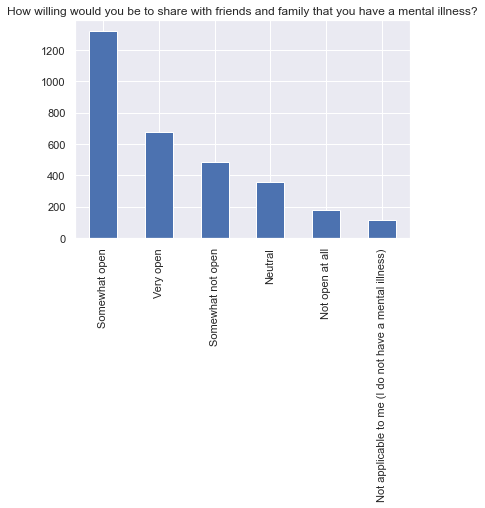

In [40]:
integrate_df.AttitudeQ3.value_counts().plot(kind='bar')
plt.title(Column_dict['AttitudeQ3'])
plt.show()

In [41]:
for col in integrate_df.columns:
    print(col)
    print(integrate_df[col].unique())
    print('---------------------------------------')

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
---------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
---------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
---------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
---------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
---------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open']
---------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'No' 'No change' 'Negatively' 'Positively']
-----

## Clean SupportQ1

In [42]:
integrate_df.SupportQ1.value_counts()

Yes                                1331
I don't know                        708
No                                  416
Not eligible for coverage / N/A      83
Not eligible for coverage / NA       71
Name: SupportQ1, dtype: int64

In [43]:
replace_dic = { 'Not eligible for coverage / N/A': 'Not eligible',
               'Not eligible for coverage / NA': 'Not eligible'}

integrate_df.SupportQ1 = integrate_df.SupportQ1.replace(replace_dic)

In [44]:
integrate_df.SupportQ1.value_counts()

Yes             1331
I don't know     708
No               416
Not eligible     154
Name: SupportQ1, dtype: int64

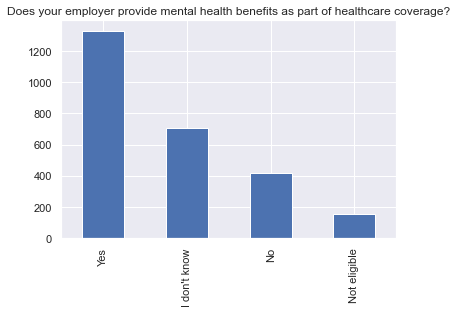

In [45]:
integrate_df.SupportQ1.value_counts().plot(kind='bar')
plt.title(Column_dict['SupportQ1'])
plt.show()

## Cleaning SupportEx1 and SupportEX2

In [46]:
Column_dict['SupportEx1']

'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?'

In [47]:
Column_dict['SupportEx1']

'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?'

In [48]:
integrate_df.SupportEx1.unique()

array([nan, "I'm not sure", 'Yes', 'No', 'No change', 'Negatively',
       'Positively'], dtype=object)

In [49]:
replace_dic = {'Yes': "I'm not sure",
               'No': "I'm not sure"}

In [50]:
integrate_df.SupportEx1 = integrate_df.SupportEx1.replace(replace_dic)
integrate_df.SupportEx2 = integrate_df.SupportEx2.replace(replace_dic)

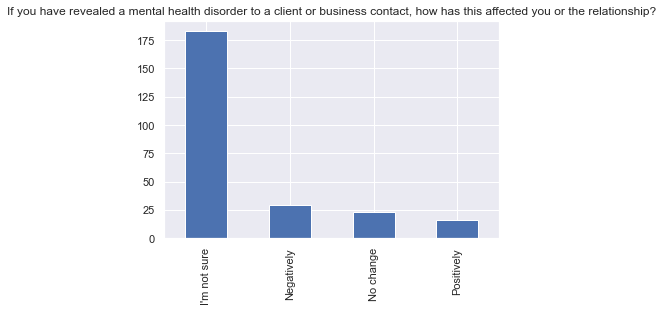

In [51]:
integrate_df.SupportEx1.value_counts().plot(kind='bar')
plt.title(Column_dict['SupportEx1'])
plt.show()

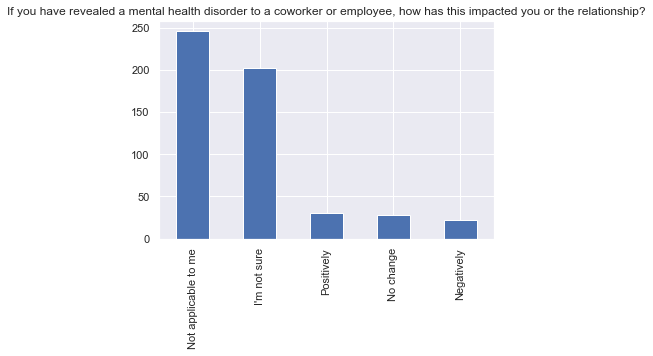

In [52]:
integrate_df.SupportEx2.value_counts().plot(kind='bar')
plt.title(Column_dict['SupportEx2'])
plt.show()

## Clean Treatment column

In [53]:
Column_dict['Treatment']

'Have you ever sought treatment for a mental health disorder from a mental health professional?'

In [54]:
integrate_df.Treatment.value_counts()

1    1857
0    1281
Name: Treatment, dtype: int64

In [55]:
replace_dic = {0:'No',
              1: 'Yes'}

In [56]:
integrate_df.Treatment = integrate_df.Treatment.replace(replace_dic)

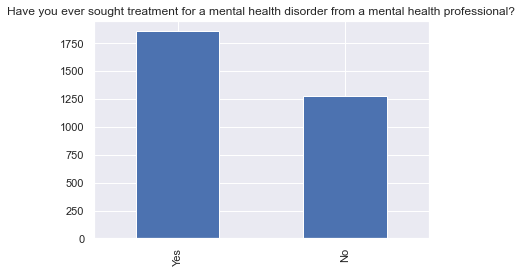

In [57]:
integrate_df.Treatment.value_counts().plot.bar()
plt.title(Column_dict['Treatment'])
plt.show()

# 3. Detecting and dealing with outliers and errors

Answers to our analytical goals rely on data vizualisation. Therefore, I don't need to detect and deal with outliers, as addressing them would be adopting the "do nothing" strategy. However, I will use outlier detection to find possible systematic erros in the data. I will vizualise all the attributes in the data and spot inconsistencies, and then fix them.

In [58]:
for col in integrate_df.columns:
    print(col)
    print(integrate_df[col].value_counts())
    print('----------------------------------------------------')

SupportQ1
Yes             1331
I don't know     708
No               416
Not eligible     154
Name: SupportQ1, dtype: int64
----------------------------------------------------
SupportQ2
No              1702
Yes              665
I don't know     242
Name: SupportQ2, dtype: int64
----------------------------------------------------
SupportQ3
No              1153
Yes              757
I don't know     699
Name: SupportQ3, dtype: int64
----------------------------------------------------
SupportQ4
I don't know    1633
Yes              813
No               163
Name: SupportQ4, dtype: int64
----------------------------------------------------
SupportQ5
Somewhat easy                 681
Very easy                     536
I don't know                  399
Somewhat difficult            378
Neither easy nor difficult    362
Difficult                     135
Very difficult                118
Name: SupportQ5, dtype: int64
----------------------------------------------------
AttitudeQ1
Yes      973


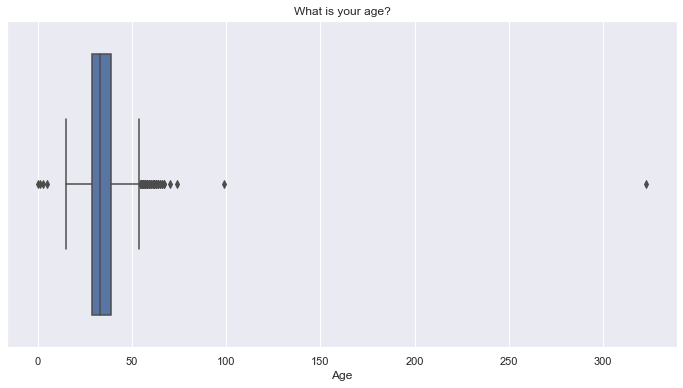

In [59]:
# Inspecting the Age column
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', data=integrate_df)
plt.title(Column_dict['Age'])
plt.show()

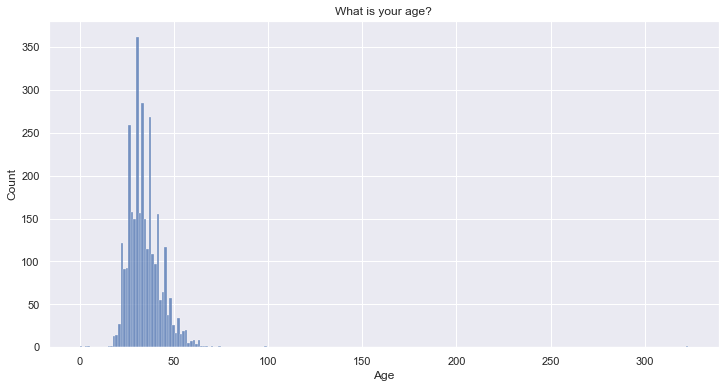

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=integrate_df)
plt.title(Column_dict['Age'])
plt.show()

There seem to exist two unreasonably high and unreasonably low values for age. These are probably mistaken inputs. Therefore, I'm going to switch these values to NaN. Age below 18 years old will also be set to NaN.

In [61]:
# replacing outliers by 'NaN'
BM = (integrate_df['Age'] > 90) | (integrate_df['Age'] < 18)
for idx in integrate_df[BM].index:
    integrate_df.at[idx,'Age'] = np.nan

In [62]:
# checking 
integrate_df[BM]['Age']

93     NaN
372    NaN
564    NaN
656    NaN
808    NaN
2720   NaN
2963   NaN
2964   NaN
Name: Age, dtype: float64

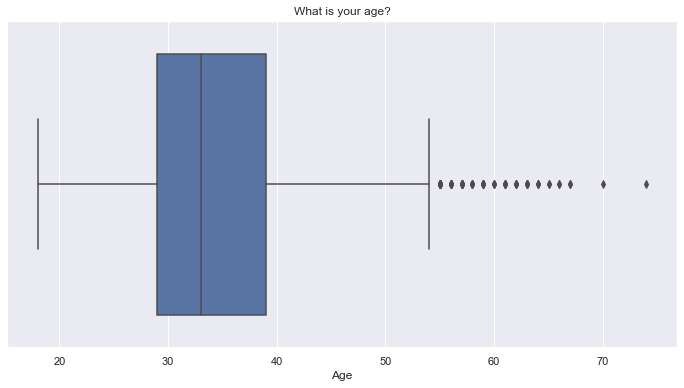

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', data=integrate_df)
plt.title(Column_dict['Age'])
plt.show()

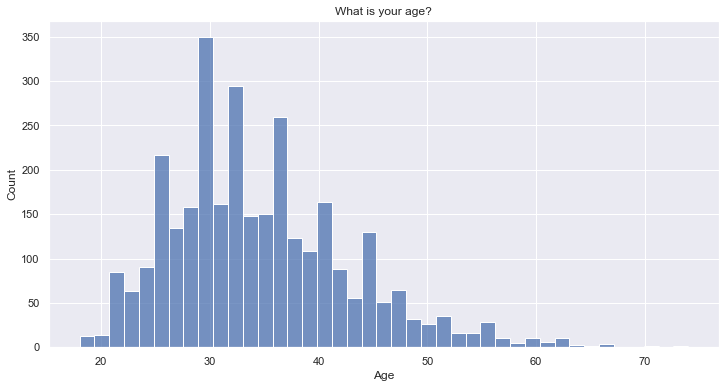

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(x='Age', data=integrate_df)
plt.title(Column_dict['Age'])
plt.show()

In [65]:
integrate_df.columns

Index(['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
       'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'SupportEx1', 'SupportEx2',
       'Age', 'Gender', 'ResidingCountry', 'WorkingCountry', 'MentalIlness',
       'Treatment', 'Year'],
      dtype='object')

In [66]:
cat_attributes = ['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
                  'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'SupportEx1', 'SupportEx2',
                  'Gender', 'ResidingCountry', 'WorkingCountry', 'MentalIlness',
                  'Treatment', 'Year']

num_attributes = ['Age']

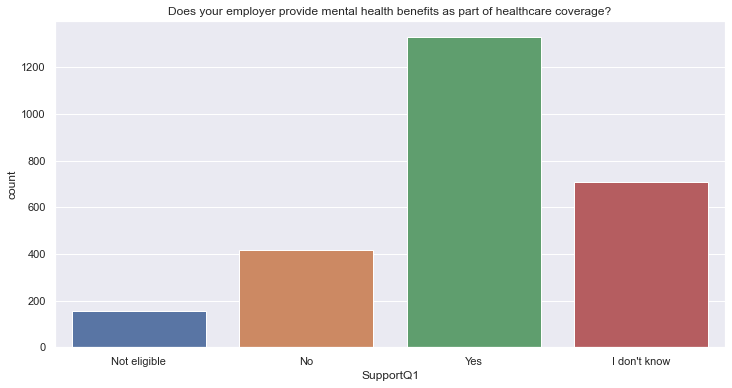

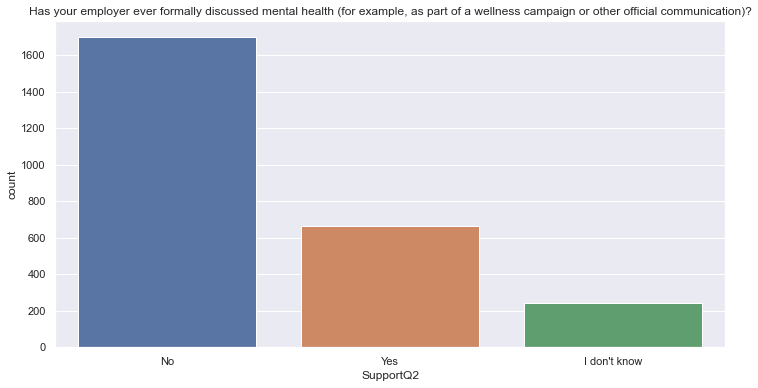

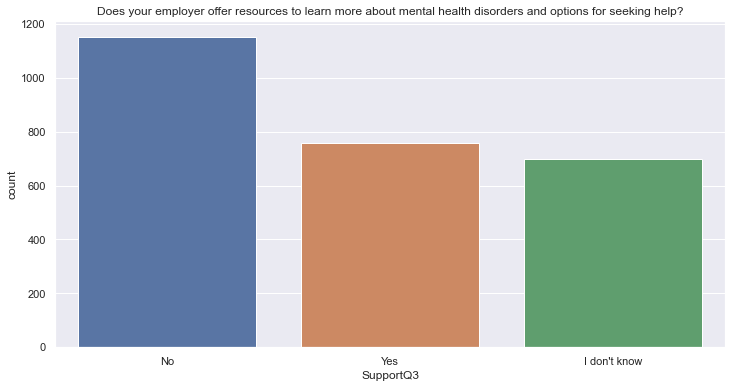

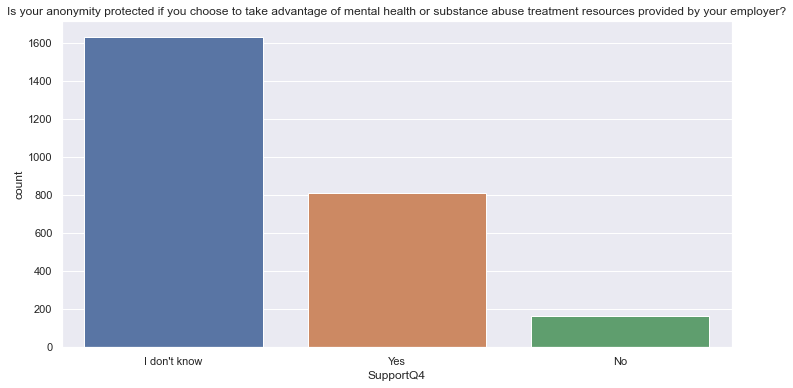

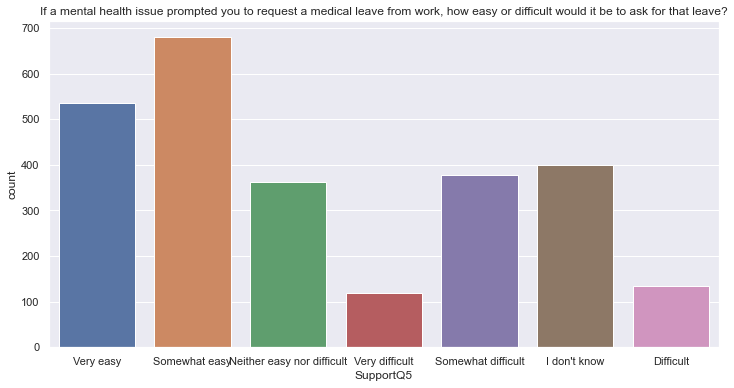

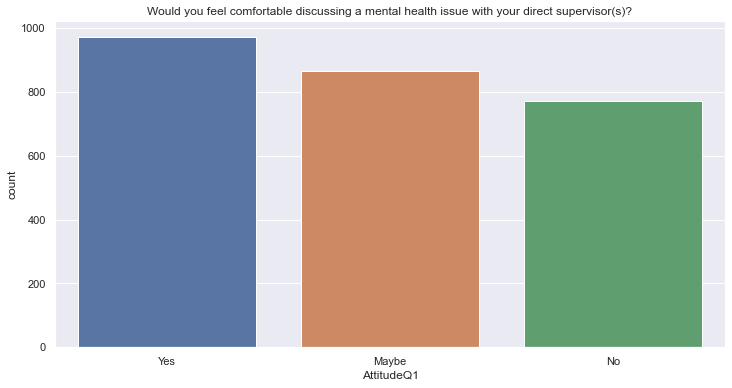

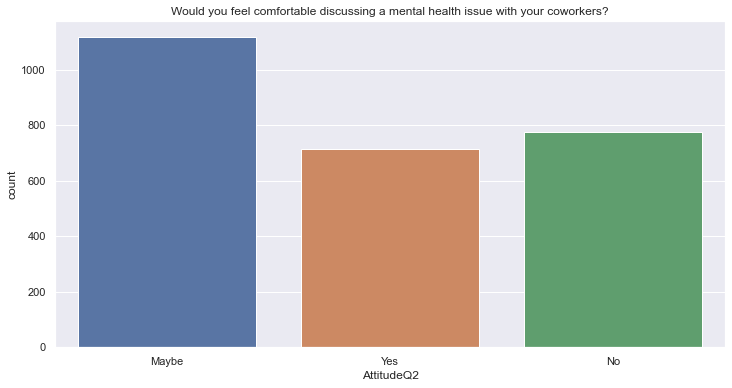

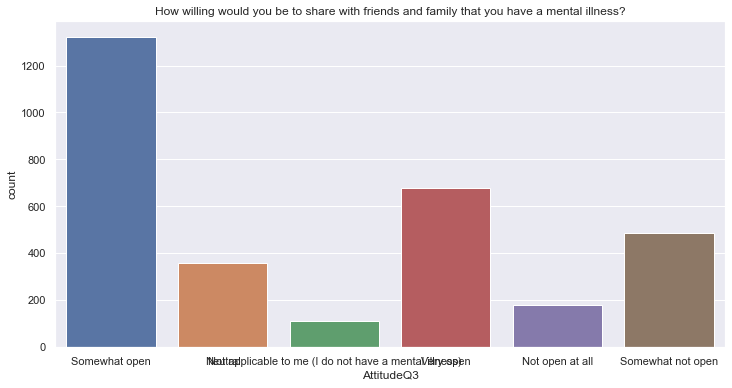

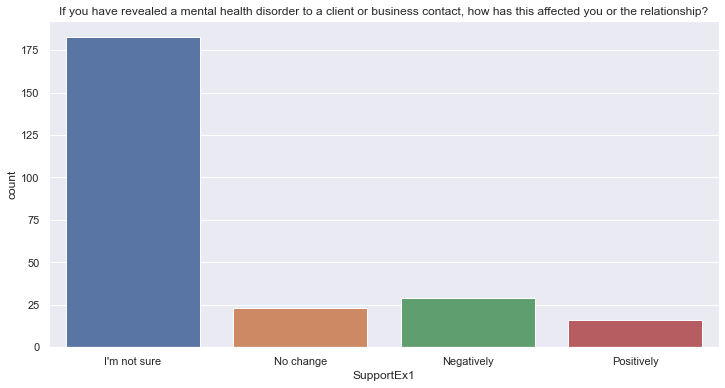

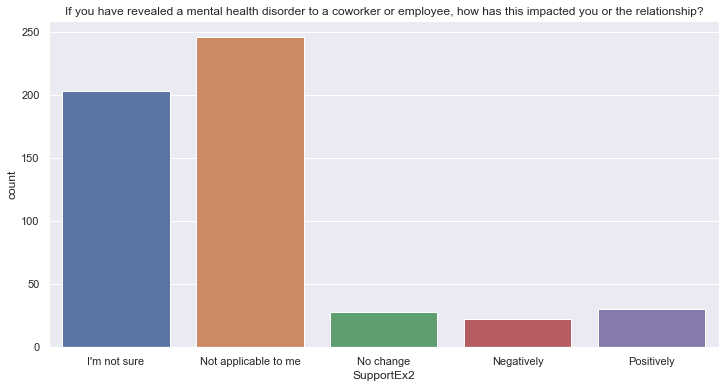

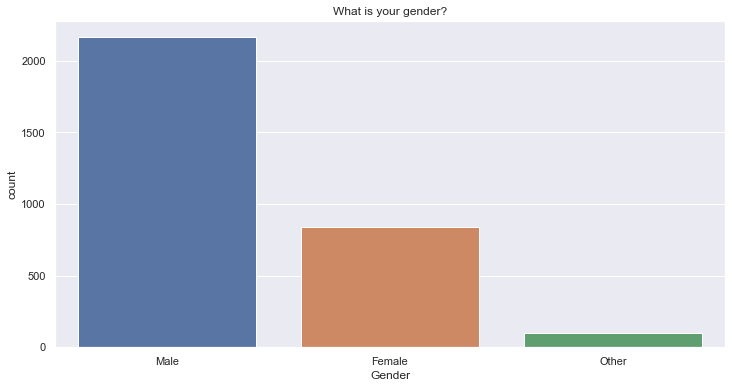

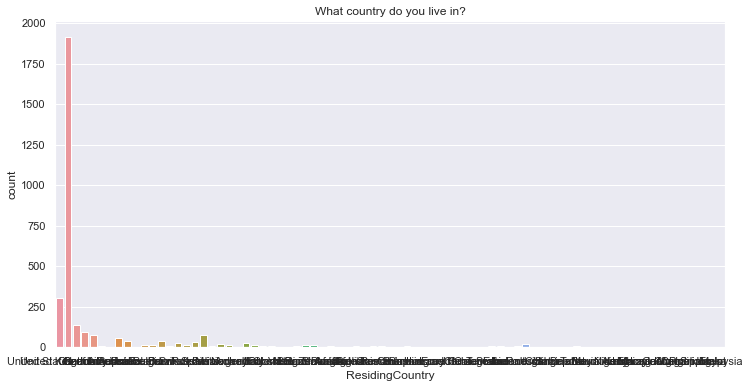

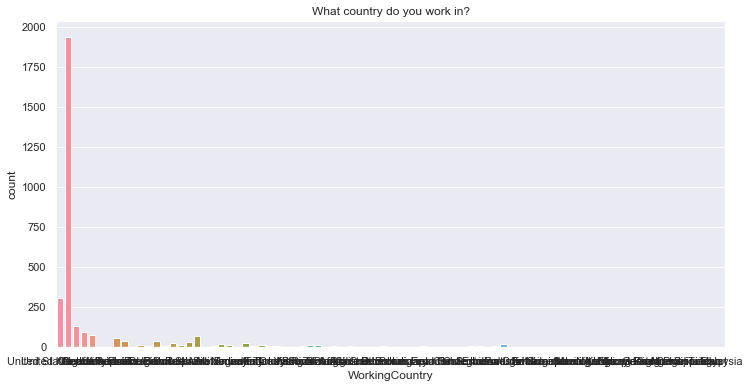

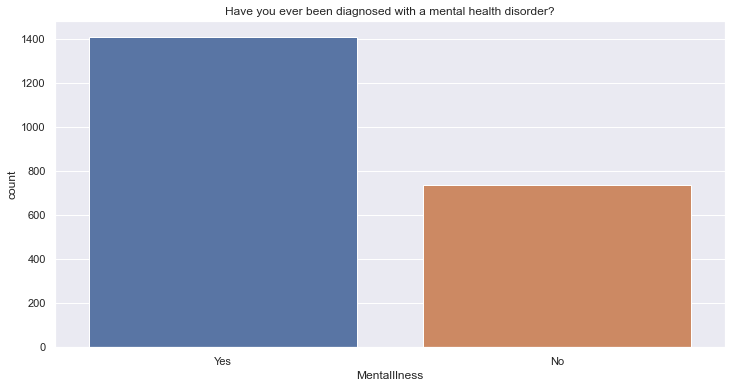

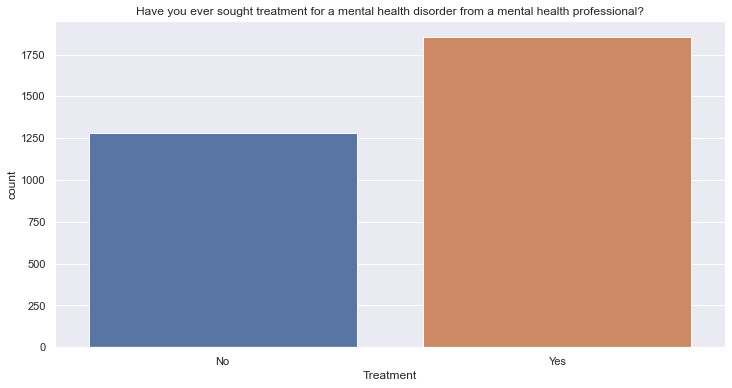

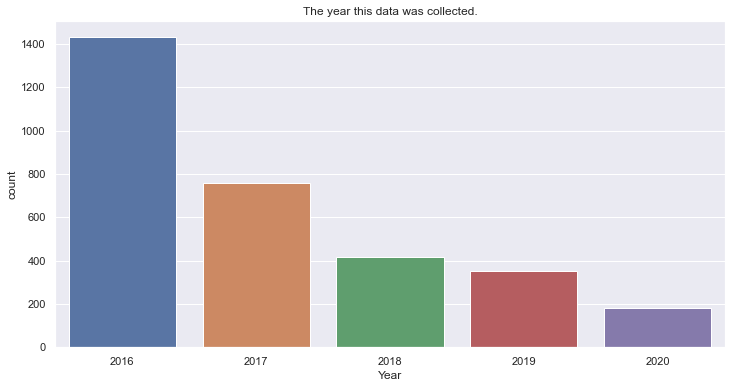

In [67]:
# cheecking outliers in other attributes
for att in cat_attributes:
    plt.figure(figsize=(12,6))
    sns.countplot(x=att, data=integrate_df)
    plt.title(Column_dict[att])
    plt.show()

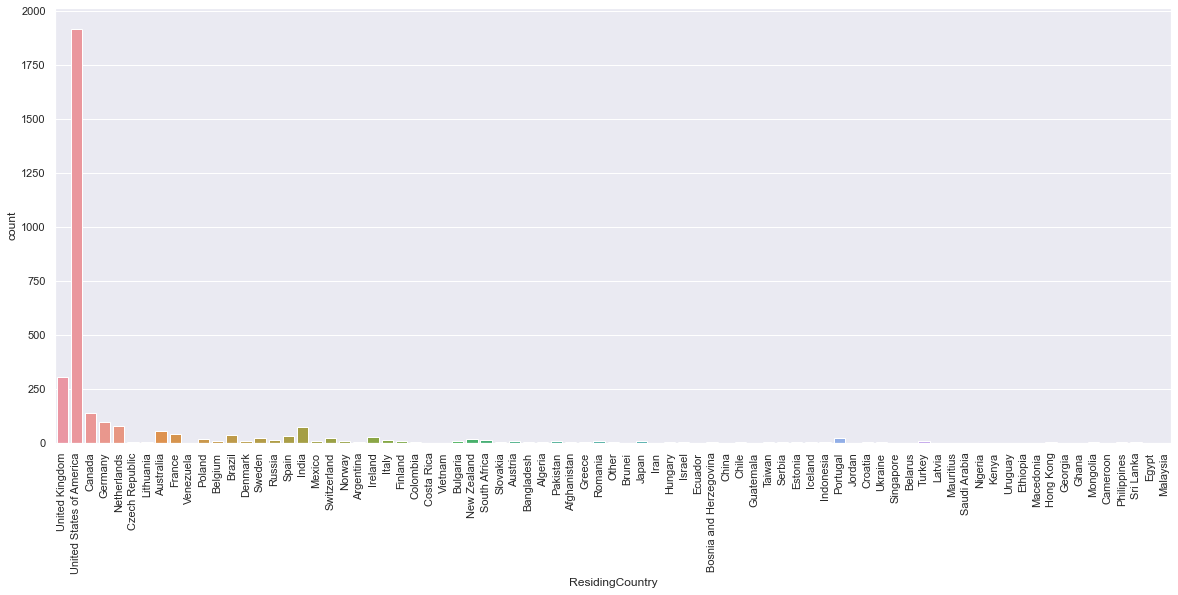

In [68]:
plt.figure(figsize=(20,8))
sns.countplot(x='ResidingCountry', data=integrate_df)
plt.tick_params(axis='x', rotation=90)
plt.show()

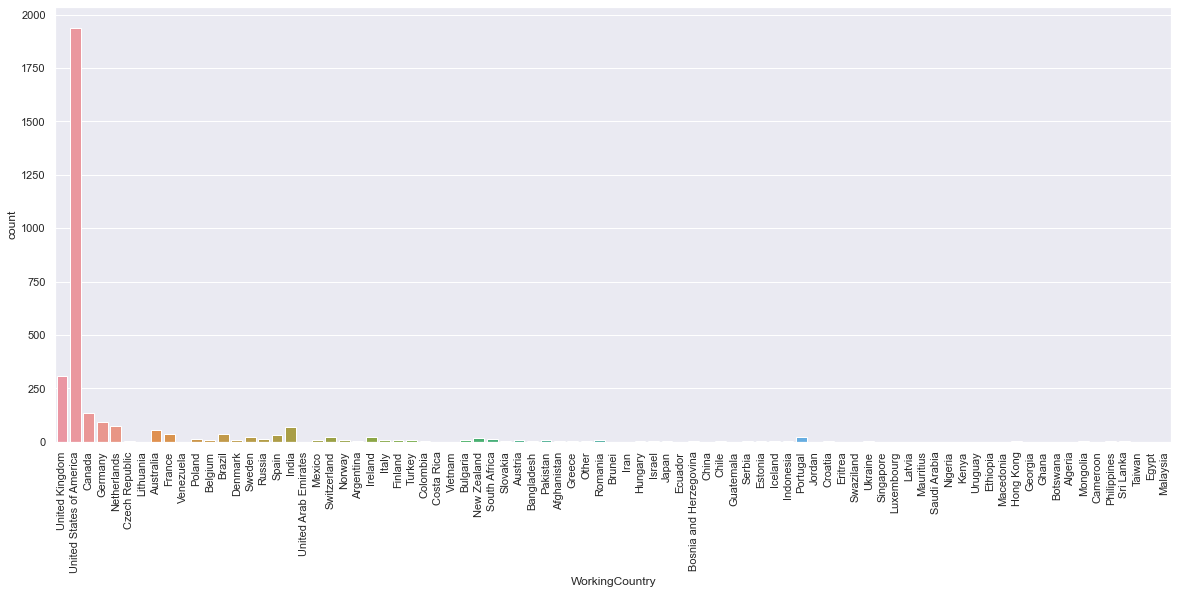

In [69]:
plt.figure(figsize=(20,8))
sns.countplot(x='WorkingCountry', data=integrate_df)
plt.tick_params(axis='x', rotation=90)
plt.show()

There are more data entries from the US than the other countries. This might be because the survey participation was more encouraged in the US. 

To deal with this situation, the best way is to focus the analysis on the US respondents instead of the whole data. Therefore, I'm going to remove all the rows, except for the ones that have 'United States of America' under both WorkingCountry and ResidingCountry.


In [70]:
BM = (integrate_df.ResidingCountry == 'United States of America') & \
    (integrate_df.WorkingCountry == 'United States of America')

in_df_us = integrate_df[BM]

In [71]:
in_df_us.ResidingCountry.value_counts()

United States of America    1913
Name: ResidingCountry, dtype: int64

In [72]:
in_df_us.WorkingCountry.value_counts()

United States of America    1913
Name: WorkingCountry, dtype: int64

In [73]:
# droppping the ResidingCountry and WorkingCountry columns

in_df_us.drop(columns=['ResidingCountry','WorkingCountry'], inplace=True)

In [74]:
in_df_us.reset_index(drop=True, inplace=True)

# CHECK POINT

In [75]:
# creating a checkpoint
in_df = in_df_us

In [76]:
in_df.head(5)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,MentalIlness,Treatment,Year
0,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,NaN,NaN,29.0,Male,Yes,Yes,2016
1,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,NaN,NaN,43.0,Female,Yes,Yes,2016
2,I don't know,No,No,I don't know,Somewhat easy,Yes,Maybe,Not applicable to me (I do not have a mental i...,NaN,NaN,30.0,Male,No,No,2016
3,Yes,No,Yes,Yes,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,37.0,Female,Yes,Yes,2016
4,I don't know,No,No,I don't know,Very difficult,Maybe,Yes,Somewhat open,NaN,NaN,44.0,Female,Yes,Yes,2016


## 4. Detecting and Dealing with missing values

In [77]:
# find count of missing values 

for col in in_df.columns:
    
    BM = in_df[col].isnull()
    missing = in_df[BM]
    print(col)
    print(len(missing))
    print('-----------------------------------------')

SupportQ1
228
-----------------------------------------
SupportQ2
228
-----------------------------------------
SupportQ3
228
-----------------------------------------
SupportQ4
228
-----------------------------------------
SupportQ5
228
-----------------------------------------
AttitudeQ1
228
-----------------------------------------
AttitudeQ2
228
-----------------------------------------
AttitudeQ3
0
-----------------------------------------
SupportEx1
1810
-----------------------------------------
SupportEx2
1685
-----------------------------------------
Age
4
-----------------------------------------
Gender
10
-----------------------------------------
MentalIlness
536
-----------------------------------------
Treatment
0
-----------------------------------------
Year
0
-----------------------------------------


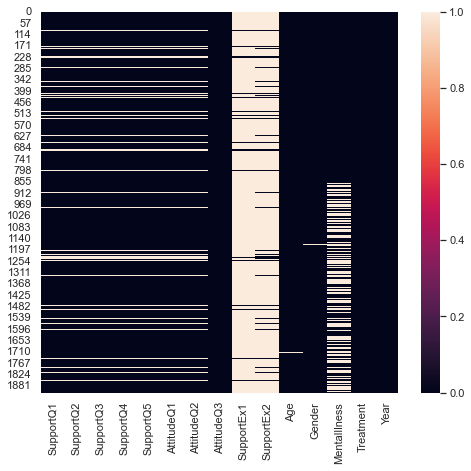

In [78]:
# which attributes have considerable missing values?
plt.figure(figsize=(8,7))
sns.heatmap(in_df.isna())
plt.show()

Considering the preceding figure, the answer to our wondering is yes, some data objects have missing values on more than one attribute. The missing values for the attributes from SupportQ1 to AttitudeQ3 are from the same data objects. However, the preceding figure brings our attention to the fact that the missing values under SupportEx1 and SupportEx2 are much more troublesome, as the majority of the data objects have missing values under these two attributes. 

The best way of moving forward in these situations is to forego having these attributes. So these two attributes have been removed from the analysis. 

Now, let's bring our attention back to the common missing values among the data objects for the attributes from SupportQ1 to AttitudeQ3.

 

In [79]:
in_df.drop(columns=['SupportEx1','SupportEx2'], inplace=True)

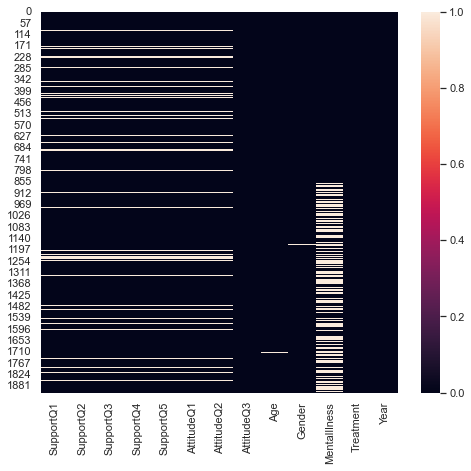

In [80]:
plt.figure(figsize=(8,7))
sns.heatmap(in_df.isna())
plt.show()

### 4.1 The common Missing values in attributes SupportQ1 to AttitudeQ3

Since the missing values are common in attributes SupportQ1 to AttitudeQ3. I will run the diagnosis only for SupportQ1 as the conclusion about the type of missing values in these attributes will be the same.

In [81]:
# HELP FUNCTIONS TO DIAGNOSE TYPE OF MISSING VALUES
# Code from Chapter 11 for the diagnosis of MVs
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}
    
    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())    
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])
   
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()
    
    plt.figure(figsize=(10,4))
    
    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()
    
    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()
    
    p_value = ttest_ind(group_1_data,group_2_data).pvalue
    
    print('p-value of t-test: {}'.format(p_value))
    
    
# Code from Chapter 11 for the diagnosis of MVs
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])   
    p_value = chi2_contingency(contigency_table)[1]
    
    print('p-value of Chi_squared test: {}'.format(p_value))

Diagnosis Analysis of Missing Values for Age:


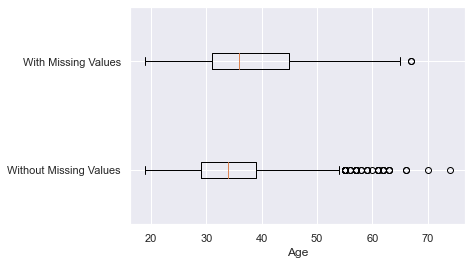

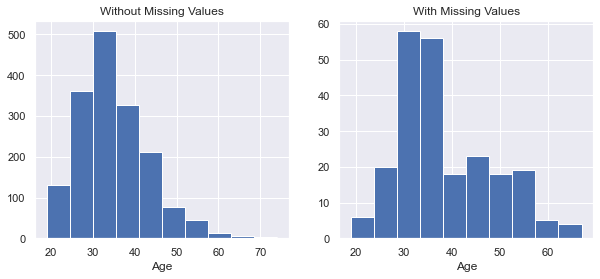

p-value of t-test: 4.807267428880384e-10
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [82]:
# Diagnosing the influence of the attribute 'Age' on the missing values in SupportQ1
# i.e., is there a relationship between 'Age' and the missing values in SupportQ1
numerical_attributes = ['Age']

BM_MV = in_df.SupportQ1.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

From the above figure, we can see that 'Age' has a relationship with the missing values in **supportQ1**. especially, the older population in the dataset has left these questions unanswered. The p-value fo the t-test confirms my observation. Thus, we can conclude that the missing values in **SupportQ1** are of **Missing At Random (MAR)** type. 

 
I will deal with missing values later in the analysis if the analytic goal requires that.

Diagnosis Analysis of Missing Values for AttitudeQ3:


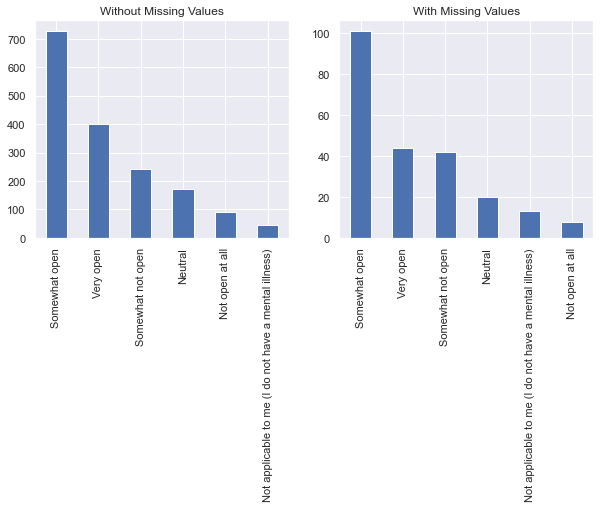

p-value of Chi_squared test: 0.04761658679854561
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Gender:


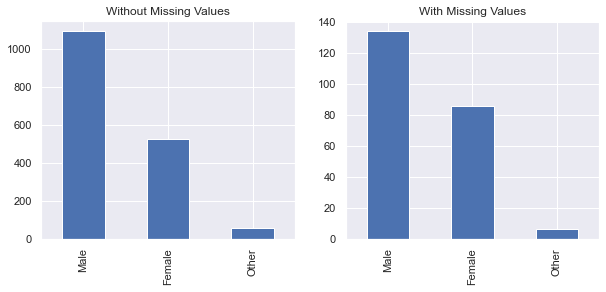

p-value of Chi_squared test: 0.13561629732478442
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for MentalIlness:


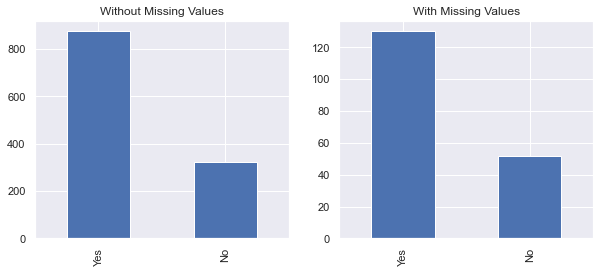

p-value of Chi_squared test: 0.693647485888784
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Treatment:


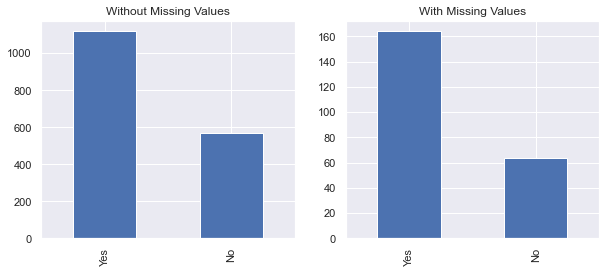

p-value of Chi_squared test: 0.10810722533716499
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Year:


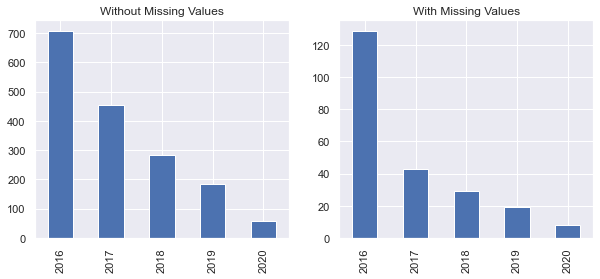

p-value of Chi_squared test: 0.0012055539174552995
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [83]:
# Diagnosing the influence of the categorical attributes on the missing values in SupportQ1
cat_attribues = ['AttitudeQ3', 'Gender', 'MentalIlness', 'Treatment', 'Year']

BM_MV = in_df.SupportQ1.isna()
for att in cat_attribues:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Categorical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

Only 'Year' seem to be significantly impacting the MVs in SupportQ1. However, 'Year' indicates the year the survey was conducted.

### 4.2 The missing values in MentalIlness

Diagnosis Analysis of Missing Values for Age:


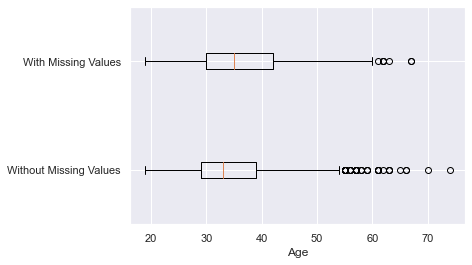

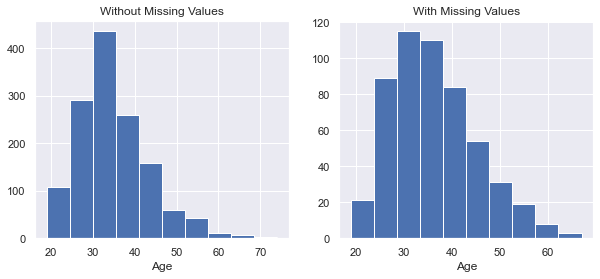

p-value of t-test: 6.924335766869287e-05
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [84]:
# Diagnosing the influence of the attribute 'Age' on the missing values in 'MentalIlness'
# i.e., is there a relationship between 'Age' and the missing values in 'MentalIlness'
numerical_attributes = ['Age']

BM_MV = in_df.MentalIlness.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

Diagnosis Analysis of Missing Values for SupportQ1:
Does your employer provide mental health benefits as part of healthcare coverage?


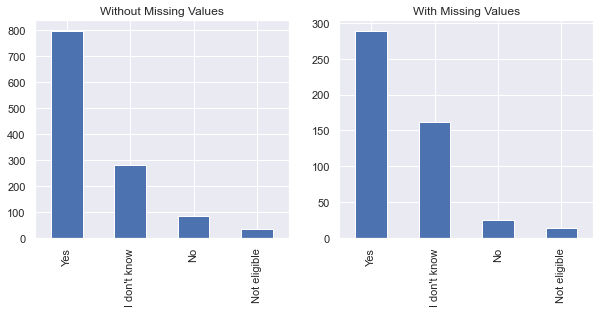

p-value of Chi_squared test: 0.0004266621820911183
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ2:
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?


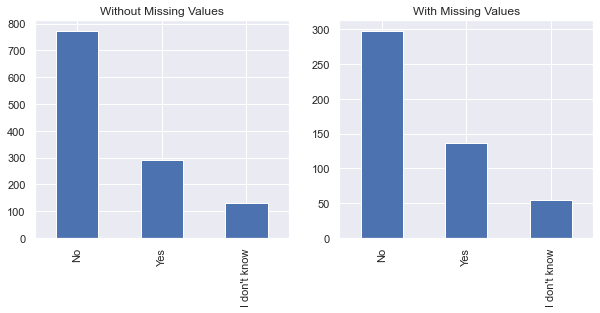

p-value of Chi_squared test: 0.26967281692328904
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ3:
Does your employer offer resources to learn more about mental health disorders and options for seeking help?


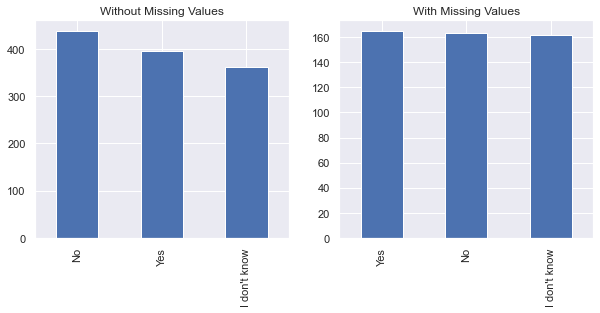

p-value of Chi_squared test: 0.3572638558201442
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ4:
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?


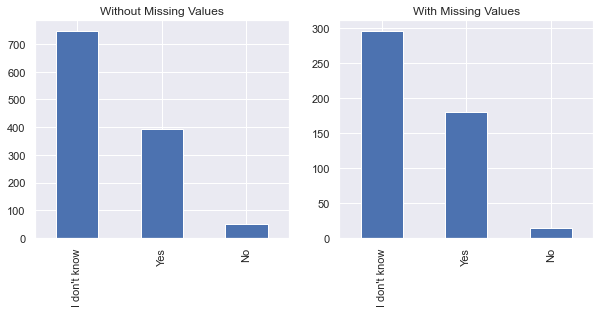

p-value of Chi_squared test: 0.16296549689934467
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ5:
If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?


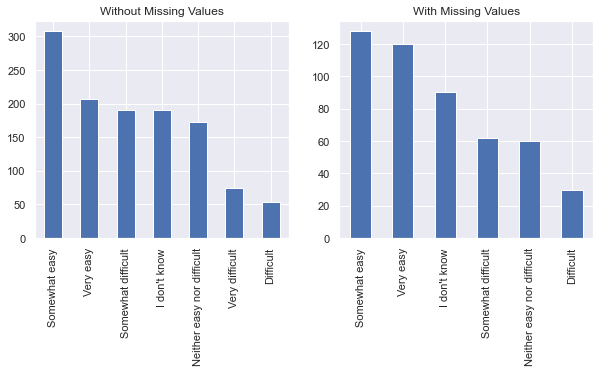

p-value of Chi_squared test: 2.6531252599614132e-08
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ1:
Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?


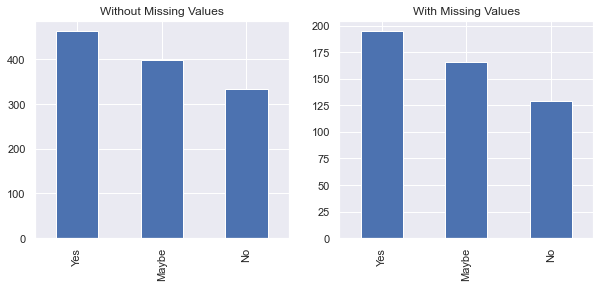

p-value of Chi_squared test: 0.8091802115423412
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ2:
Would you feel comfortable discussing a mental health issue with your coworkers?


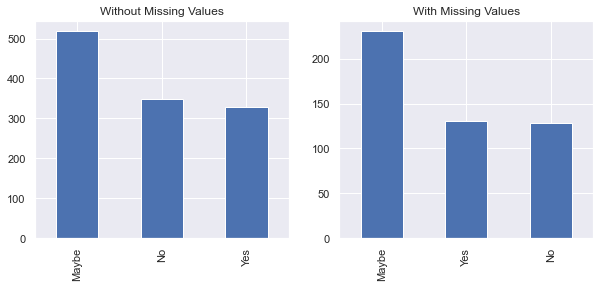

p-value of Chi_squared test: 0.3251602604350022
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ3:
How willing would you be to share with friends and family that you have a mental illness?


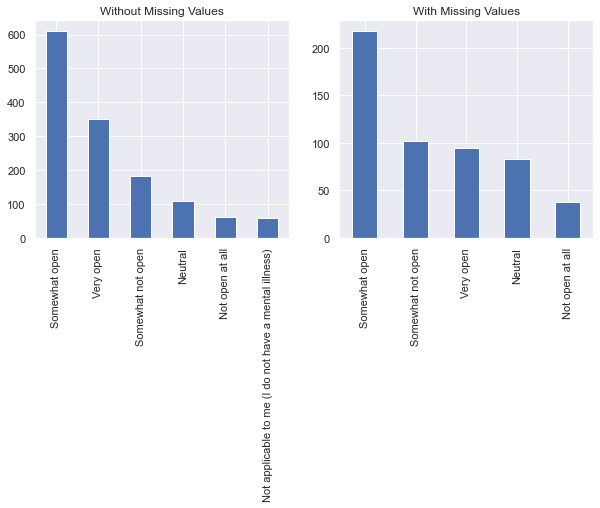

p-value of Chi_squared test: 1.2350378950902818e-13
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Gender:
What is your gender?


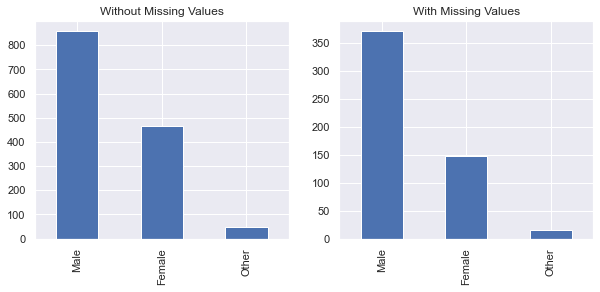

p-value of Chi_squared test: 0.015399678216870537
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Treatment:
Have you ever sought treatment for a mental health disorder from a mental health professional?


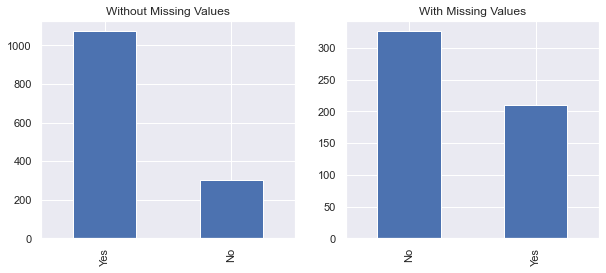

p-value of Chi_squared test: 2.4710734891681166e-58
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Year:
The year this data was collected.


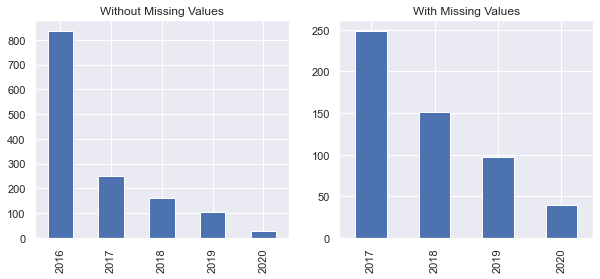

p-value of Chi_squared test: 6.48536081496545e-125
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [85]:
cat_attribues = ['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
       'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'Gender', 'Treatment', 'Year']

BM_MV = in_df.MentalIlness.isna()
for att in cat_attribues:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    print(Column_dict[att])
    Diagnose_MV_Categorical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

missing values under this attribute are closely connected with the Age, Treatment, and Year attributes. It is apparent that these missing values are also of the MAR type.
 
I will deal with missing values later in the analysis if the analytic goal requires that.

Diagnosis Analysis of Missing Values for SupportQ1:
Does your employer provide mental health benefits as part of healthcare coverage?


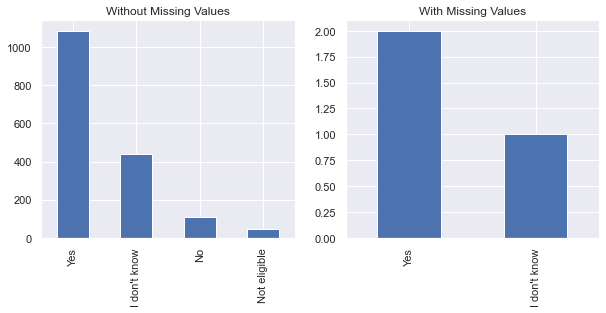

p-value of Chi_squared test: 0.9517514008303383
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ2:
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?


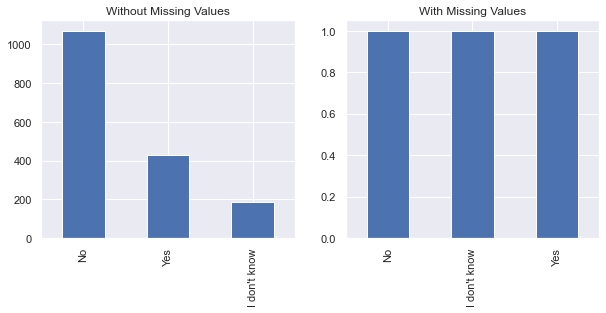

p-value of Chi_squared test: 0.39460072404015833
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ3:
Does your employer offer resources to learn more about mental health disorders and options for seeking help?


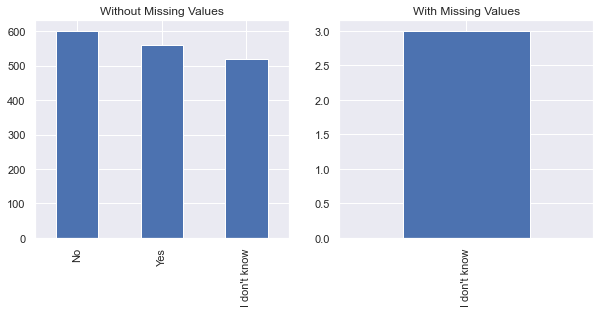

p-value of Chi_squared test: 0.035485179407658066
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ4:
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?


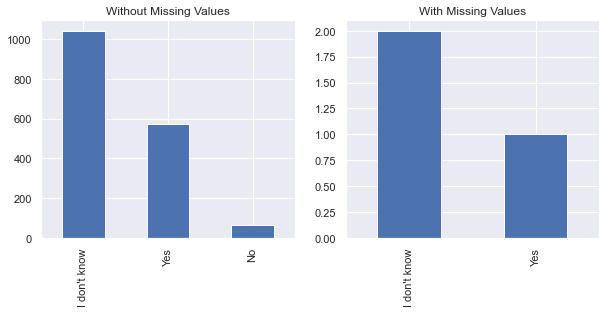

p-value of Chi_squared test: 0.9375263307840601
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ5:
If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?


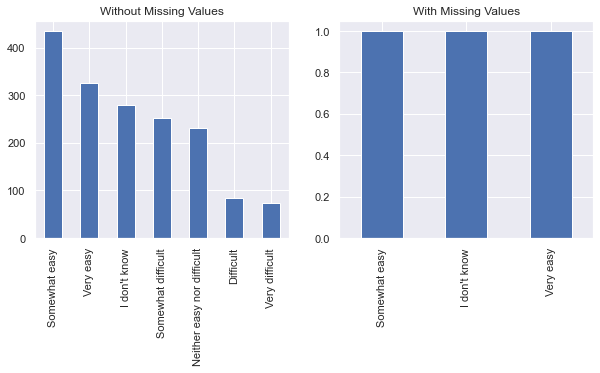

p-value of Chi_squared test: 0.9182766428844711
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ1:
Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?


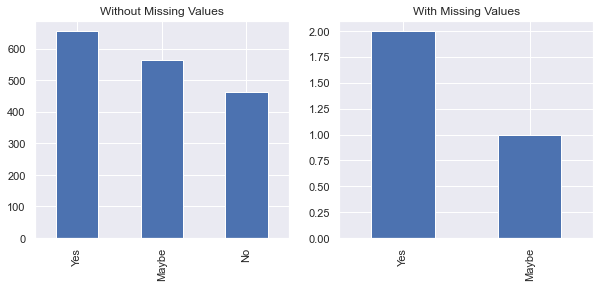

p-value of Chi_squared test: 0.4938617072469563
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ2:
Would you feel comfortable discussing a mental health issue with your coworkers?


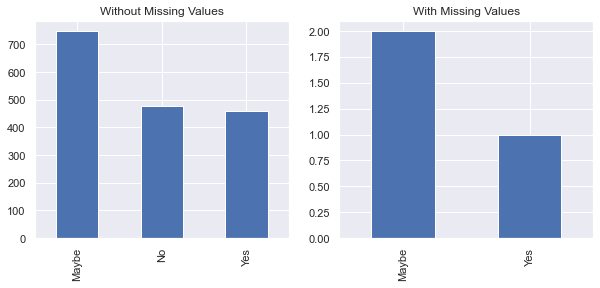

p-value of Chi_squared test: 0.5429693483815831
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ3:
How willing would you be to share with friends and family that you have a mental illness?


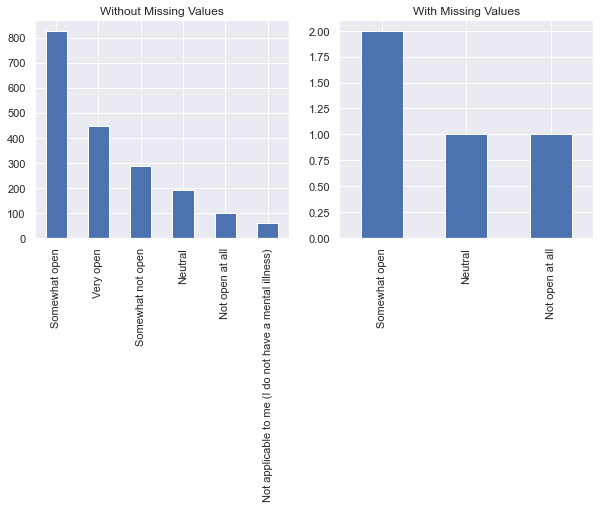

p-value of Chi_squared test: 0.34409773087172607
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Gender:
What is your gender?


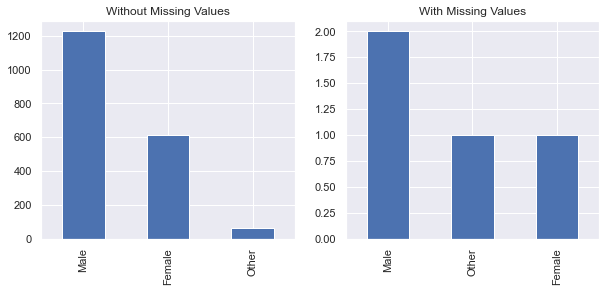

p-value of Chi_squared test: 0.04650035881500545
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Treatment:
Have you ever sought treatment for a mental health disorder from a mental health professional?


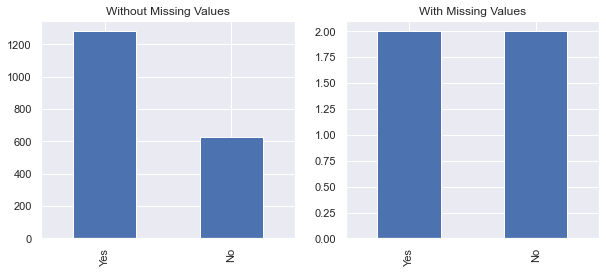

p-value of Chi_squared test: 0.8475298986887417
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Year:
The year this data was collected.


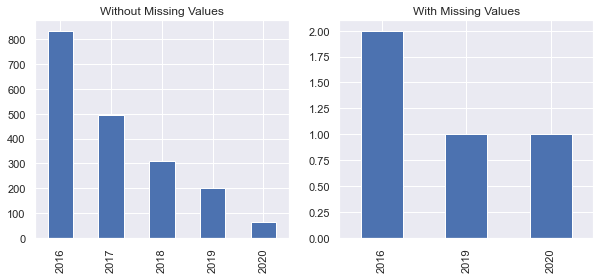

p-value of Chi_squared test: 0.0909971932460372
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [86]:
cat_attribues = ['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
       'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'Gender', 'Treatment', 'Year']

BM_MV = in_df.Age.isna()
for att in cat_attribues:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    print(Column_dict[att])
    Diagnose_MV_Categorical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

No significant relationship between the categorical attributes and 'Age'. Therefore the 4 missing values in the 'Age' attribute are of the Missing Completely At Random (MCAR) type

Diagnosis Analysis of Missing Values for Age:


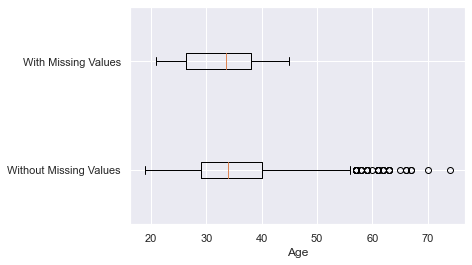

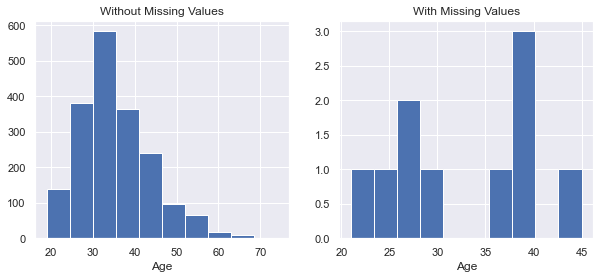

p-value of t-test: 0.3490248587382099
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [87]:
# Diagnosing the influence of the attribute 'Age' on the missing values in 'Gender'
# i.e., is there a relationship between 'Age' and the missing values in 'Gender'
numerical_attributes = ['Age']

BM_MV = in_df.Gender.isna()
for att in numerical_attributes:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    Diagnose_MV_Numerical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

Diagnosis Analysis of Missing Values for SupportQ1:
Does your employer provide mental health benefits as part of healthcare coverage?


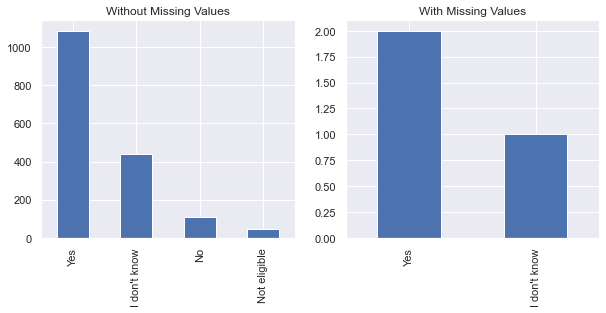

p-value of Chi_squared test: 0.9517514008303383
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ2:
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?


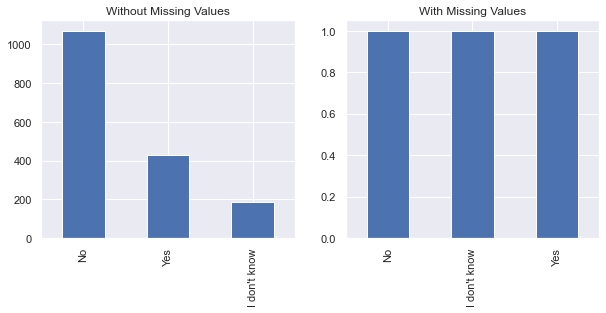

p-value of Chi_squared test: 0.39460072404015833
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ3:
Does your employer offer resources to learn more about mental health disorders and options for seeking help?


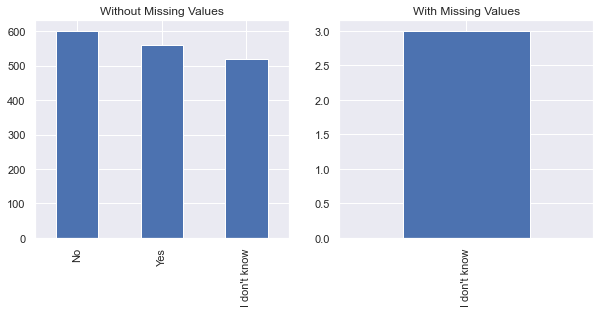

p-value of Chi_squared test: 0.035485179407658066
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ4:
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?


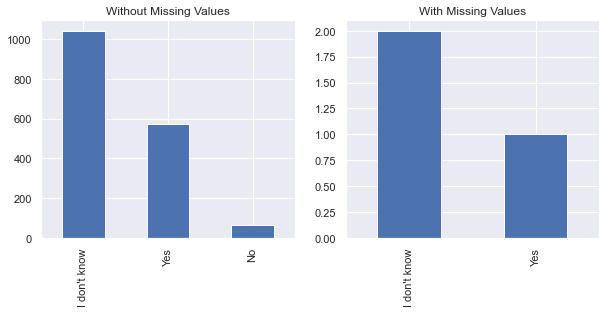

p-value of Chi_squared test: 0.9375263307840601
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for SupportQ5:
If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?


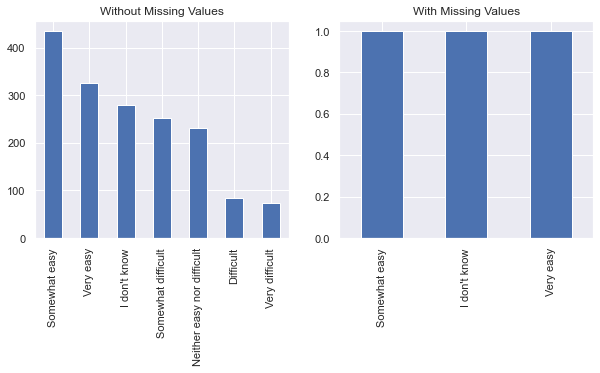

p-value of Chi_squared test: 0.9182766428844711
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ1:
Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?


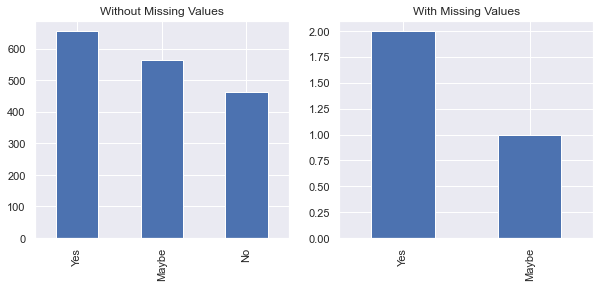

p-value of Chi_squared test: 0.4938617072469563
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ2:
Would you feel comfortable discussing a mental health issue with your coworkers?


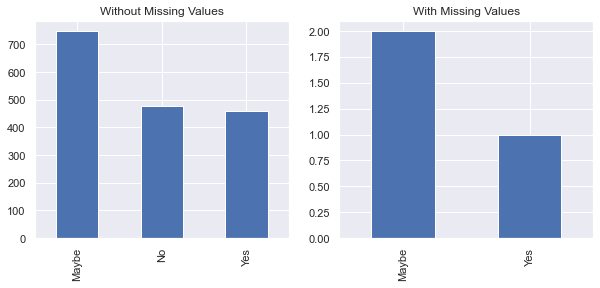

p-value of Chi_squared test: 0.5429693483815831
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for AttitudeQ3:
How willing would you be to share with friends and family that you have a mental illness?


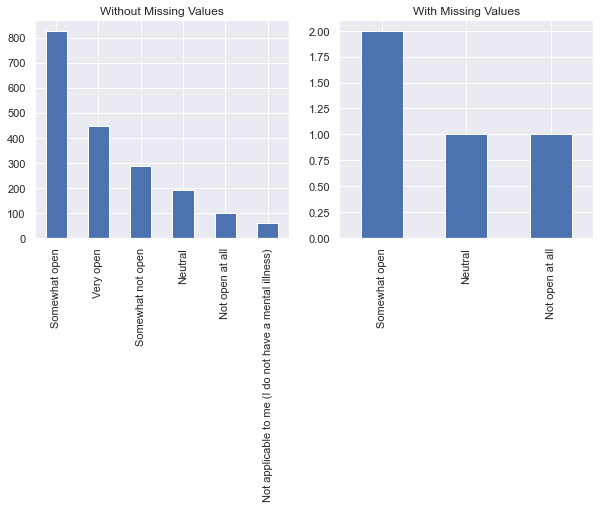

p-value of Chi_squared test: 0.34409773087172607
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for MentalIlness:
Have you ever been diagnosed with a mental health disorder?


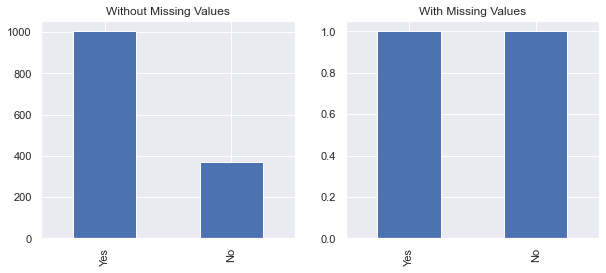

p-value of Chi_squared test: 1.0
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Treatment:
Have you ever sought treatment for a mental health disorder from a mental health professional?


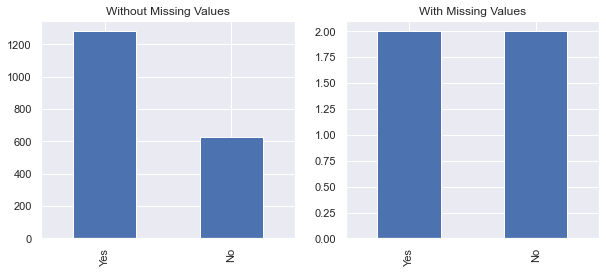

p-value of Chi_squared test: 0.8475298986887417
- - - - - - - - - - - - divider - - - - - - - - - - - 
Diagnosis Analysis of Missing Values for Year:
The year this data was collected.


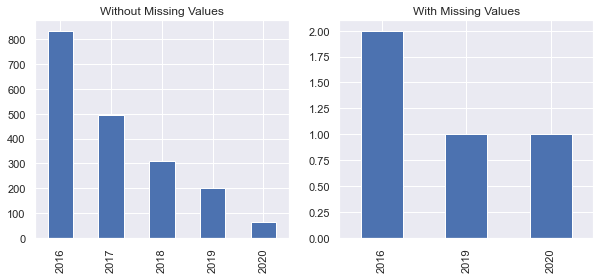

p-value of Chi_squared test: 0.0909971932460372
- - - - - - - - - - - - divider - - - - - - - - - - - 


In [88]:
cat_attribues = ['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
       'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'MentalIlness', 'Treatment', 'Year']

BM_MV = in_df.Age.isna()
for att in cat_attribues:
    print('Diagnosis Analysis of Missing Values for {}:'.format(att))
    print(Column_dict[att])
    Diagnose_MV_Categorical(in_df,att,BM_MV)
    print('- - - - - - - - - - - - divider - - - - - - - - - - - ')

No significant relationship between the categorical attributes and the 'Gender' attribute. Therefore the 10 missing values in the 'Gender' attribute are assumed to be of the Missing Completely At Random (MCAR) type

Now that the dataset is clean and integrated, let's move our attention to the analysis part.

I will continue preprocessing the data as we go about answering the four questions in this case study. Let's progress in this subsection one AQ at a time.


# 5. Analysis

## AQ1 – is there a significant difference between the mental health of employees across the attribute of gender?


To answer this question, I need to vizualise the interaction between between the attributes: **Gender**, **MentalIlness**, and **Treatment**. 

**MentalIlness** has 536 missing **MAR** values and those values have a relationship with the **Treatment** attribute. However, as the goal of this **AQ1** is to see the mental health across **Gender**, I will avoid interacting with **Treatment** and **MentalIlness** and bring the focus of my analysis to the interaction of the **Gender** attribute with both of these two attributes. With this strategy, I can adopt the do-nothing approach for the missing valyes in **MentalIlness**.

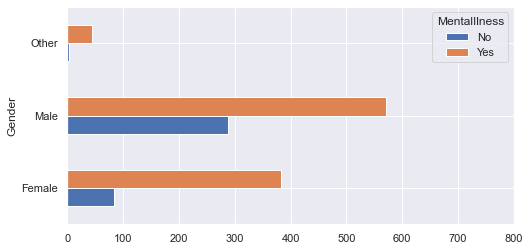

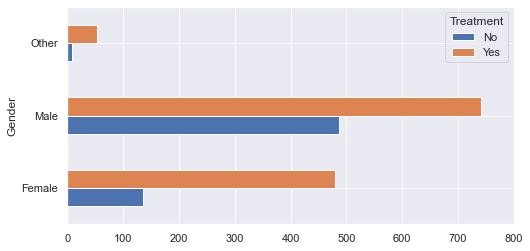

In [89]:
in_df.groupby(['Gender','MentalIlness']).size().unstack().plot.barh(xlim=[0,800],figsize=(8,4))
plt.savefig('./visuals/AQ1.png', dpi=1000,bbox_inches='tight')
plt.show()
in_df.groupby(['Gender','Treatment']).size().unstack().plot.barh(xlim=[0,800],figsize=(8,4))
plt.savefig('./visuals/AQ12.png', dpi=1000,bbox_inches='tight')
plt.show()


The preceding barplot shows that the mental health of tech employees does change across the **Gender** attribute.
* The ratio of <u>not having a mental illness</u> compared to <u>having a mental illness</u> is higher for *Male* than *Female*.
* The ratio of <u>"never having sought professional mental health help"</u> compared to <u>"having south professional mental health treatment"</u> is higher among *Male* than *Female*.

These observations suggest that there is a population of male employees in tech that are not aware of their mental health and have never sought professional help. Based on these observations, it should be recommended to target male employees for mental health awareness.

Another important observation from the preceding figure is that there seem to be many more mental health concerns for the individuals who have not chosen Male or Female for their gender. However, the preceding figure does not show what the difference is because this segment of the population has much smaller data objects than Male and Female. Therefore, to tease out the portion of these individuals with mental health concerns and compare them with the other two subpopulations, the following two heat maps were created:
 

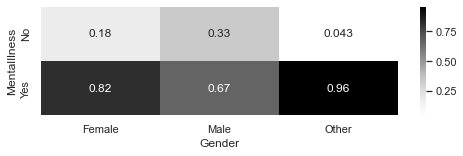

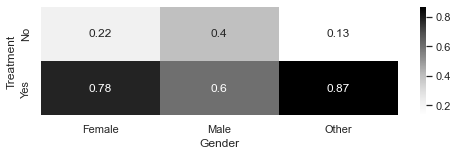

In [90]:
plt.figure(figsize=(8,2))
cont_table = pd.crosstab(in_df.MentalIlness,in_df.Gender)
probablity_tbl = cont_table/ cont_table.sum()
sns.heatmap(probablity_tbl,annot=True, center=0.5 ,cmap="Greys")
plt.savefig('./visuals/AQ1_1.png', dpi=1000,bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,2))
cont_table = pd.crosstab(in_df.Treatment,in_df.Gender)
probablity_tbl = cont_table/ cont_table.sum()
sns.heatmap(probablity_tbl,annot=True, center=0.5 ,cmap="Greys")
plt.savefig('./visuals/AQ1_2.png', dpi=1000,bbox_inches='tight')
plt.show()


* 96% of the subpopulation that did not identify as *Male* or *Female* have a mental health problem. However, we can see that higher proportion of this population, similar to the population of *Female*, has south mental health treatment.

## AQ2 – is there a significant difference between the mental health of employees across the Age attribute?


To answer this question, we need to visualize the interaction between three attributes: **Age**, **Mental Illness**, and **Treatment**. We are aware that the Mental Illness attribute has 536 missing **MAR** values and those missing values have a relationship with the **Treatment** and **Age** attributes. Moreover, we are aware that **Age** has three missing **MCAR** values. 

Dealing with the missing **MCAR** values is simple, as we know these missing values are completely random. However, we cannot adopt the approach of leaving them as they are because to be able to visualize these relationships, we need to transform the Age attribute from categorical to numerical. Therefore, for this analysis, I will remove the data objects with missing values under the Age attribute.


In [91]:
BM_Age_MV = in_df.Age.isna()
wdf = in_df[~BM_Age_MV]
wdf

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,Age,Gender,MentalIlness,Treatment,Year
0,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,29.0,Male,Yes,Yes,2016
1,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,43.0,Female,Yes,Yes,2016
2,I don't know,No,No,I don't know,Somewhat easy,Yes,Maybe,Not applicable to me (I do not have a mental i...,30.0,Male,No,No,2016
3,Yes,No,Yes,Yes,Very easy,Yes,Maybe,Somewhat open,37.0,Female,Yes,Yes,2016
4,I don't know,No,No,I don't know,Very difficult,Maybe,Yes,Somewhat open,44.0,Female,Yes,Yes,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,Yes,No,No,Yes,Difficult,Maybe,Maybe,Not open at all,34.0,Male,Yes,Yes,2020
1909,Yes,Yes,Yes,I don't know,Very easy,Yes,Yes,Very open,39.0,Male,Yes,Yes,2020
1910,Yes,Yes,Yes,Yes,Very easy,Maybe,Maybe,Somewhat open,39.0,Male,NaN,Yes,2020
1911,No,No,No,No,Somewhat difficult,No,No,Very open,53.0,Male,NaN,No,2020


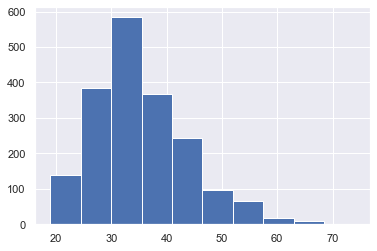

In [92]:
plt.hist(wdf.Age)
plt.show()

It would be more practical to group the Age attribute. 

In [93]:
wdf['ageGroup'] = pd.qcut(wdf.Age,3,labels=['<30','30-40','>40'])

In [94]:
wdf.ageGroup.value_counts()

<30      652
>40      634
30-40    623
Name: ageGroup, dtype: int64

I cannot take the same approach I took in AQ1 to deal with the missing MAR values of Mental Illness because this attribute has a relationship with both the Age and Treatment attributes. Therefore here I will add a third category to Mental Illness – MV-MAR. 


In [95]:
# replacing nan values with MV-MAR
wdf['MentalIlness'].fillna('MV-MAR', inplace=True)

In [96]:
wdf['MentalIlness'].value_counts()

Yes       1003
MV-MAR     534
No         372
Name: MentalIlness, dtype: int64

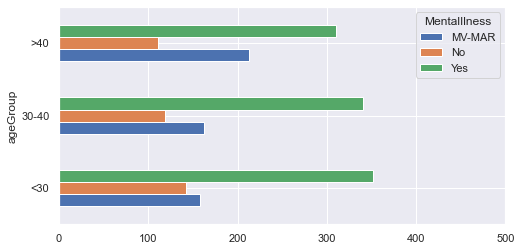

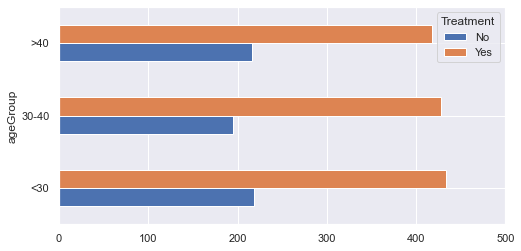

In [97]:
# visualize the relationships that we are interested in investigating:

wdf.groupby(['ageGroup', 'MentalIlness']).size().unstack().plot.barh(xlim=[0,500],figsize=(8,4))
plt.savefig('./visuals/AQ2_1.png', dpi=1000,bbox_inches='tight')
plt.show()

wdf.groupby(['ageGroup', 'Treatment']).size().unstack().plot.barh(xlim=[0,500],figsize=(8,4))
plt.savefig('./visuals/AQ2_2.png', dpi=1000,bbox_inches='tight')
plt.show()


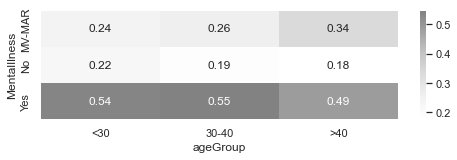

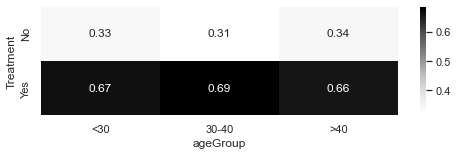

In [98]:
# Heatmap
plt.figure(figsize=(8,2))
cont_table = pd.crosstab(wdf.MentalIlness,wdf.ageGroup)
probablity_tbl = cont_table/ cont_table.sum()
sns.heatmap(probablity_tbl,annot=True, center=0.5 ,cmap="Greys")

plt.savefig('./visuals/AQ2_Heatmap_1.png', dpi=1000,bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,2))
cont_table = pd.crosstab(wdf.Treatment,wdf.ageGroup)
probablity_tbl = cont_table/ cont_table.sum()
sns.heatmap(probablity_tbl,annot=True, center=0.5 ,cmap="Greys")

plt.savefig('./visuals/AQ2_Heatmap_2.png', dpi=1000,bbox_inches='tight')
plt.show()


The preceding figures show the bar charts and heatmap that visualize the relationships that we are interested in investigating. We can see that there seem to be some patterns in the data; however, they are not as prounounced as they were under AQ1. So before discussing these patterns, I will test whether these patterns are statistically significant. Since we are dealing with categorical vairable, I will use chi-square test of association for this purpose. 

In [99]:
from scipy.stats import chi2_contingency
contigency_table = pd.crosstab(wdf.ageGroup,wdf.MentalIlness)   
p_value = chi2_contingency(contigency_table)[1]
print('p-value of Chi_squared test: {}'.format(p_value))

p-value of Chi_squared test: 0.0022404788218729006


In [100]:
contigency_table = pd.crosstab(wdf.ageGroup,wdf.Treatment)   
p_value = chi2_contingency(contigency_table)[1]
print('p-value of Chi_squared test: {}'.format(p_value))

p-value of Chi_squared test: 0.549702095016964


considering and alpha level of 0.05:

* The first p-value (0.0022) indicates that there is a significant association between *ageGroup* and *MentalIlness*

* The second p-value (0.5497) indicates that there is no significant association between *Treatment* and *ageGroup*

From these two information, we can conclude that while age does have an impact on mental health concerns, it does not impact the behavior of individuals in seeking treatment.

From the barchart, we can also observe that as the Age increases, the answer *No* to the question *Have you ever been diagnosed with a mental health disorder?* also increasses. Surprisingly, the answer *Yes* to the same question also increases.
This is surprising because we would expect these two answers to counteract with one another.The reason for this surprising observation is also shown in this bar chart; as the age increases, the number of individuals who have not answered the question has also increased. This could be because older individuals do not have as much trust in the confidentiality of the data collection.

The conclusion that is drawn from this observation is that older tech employees may need to build more trust for them to open up about their mental health concerns than younger employees.


## AQ3 – do more supportive companies have mentally healthier employees?


In [101]:
Column_dict

{'SupportQ1': 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'SupportQ2': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'SupportQ3': 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'SupportQ4': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'SupportQ5': 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'AttitudeQ1': 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'AttitudeQ2': 'Would you feel comfortable discussing a mental health issue with your coworkers?',
 'AttitudeQ3': 'How willing would you be to share with friends and family that you have a mental illness

From the above dictionary: we can see that tha attributes *SupportQ1* through *SupportQ5* can be used to answer our analytic question. However, since these attributes are categorical, I first need to perform some <u>data transformation</u>, specifically **attribute construction**. I'm going to add a new column that reflects the score of how supportive the participant's employes is of mental health. 

The *SupportQ1, SupportQ2, SupportQ3, SupportQ4,* and *SupportQ5* attributes were used to calculate SupportScore. The +1 or +0.5 values were added to **PerceivedSupportScore** where the answers to these attributes indicated support, whereas the -1 or -0.5 values were subtracted from PerceivedSupportScore where the answers to these attributes indicated a lack of support. For instance, for *SupportQ5*, the +1, +0.5, -0.5, -0.75, and -1 values were added/subtracted respectively for *Very easy, Somewhat easy, Somewhat difficult, difficult,* and *Very difficult*. The question that *SupportQ5* asked was *If a mental health issue prompted you to request medical leave from work, how easy or difficult would it be to ask for that leave?*


In [102]:
# filling the missing values in the supportQ1 to SupportQ5 with the value 'Missing'
# to exclude them from the PerceivedSupportScore calculation
support_cols = ['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5']
for col in support_cols:
    in_df[col].fillna('Missing', inplace=True)

In [103]:
def CalculateSupportScore(row):
    
    s = 0
    if(row.SupportQ1 == 'Missing'):
        s = 9
    if(row.SupportQ1 == 'Yes'):
        s = s +1
    if(row.SupportQ1 == 'No'):
        s = s -1
    if(row.SupportQ1 == 'Not eligible'):
        s = s -0.5
        
    if(row.SupportQ2 == 'Yes'):
        s = s +1
    if(row.SupportQ2 == 'No'):
        s = s -1
    
    if(row.SupportQ3 == 'Yes'):
        s = s +1
    if(row.SupportQ3 == 'No'):
        s = s -1
        
    if(row.SupportQ4 == 'Yes'):
        s = s +1
    if(row.SupportQ4 == 'No'):
        s = s -1
        
    if(row.SupportQ5 == 'Very easy'):
        s = s +1
    if(row.SupportQ5 == 'Somewhat easy'):
        s = s +0.5
    if(row.SupportQ5 == 'Somewhat difficult'):
        s = s - 0.5
    if(row.SupportQ5 == 'Somewhat difficult'):
        s = s - 0.75
    if(row.SupportQ5 == 'Very difficult'):
        s = s -1
    return s

In [104]:
in_df['PerceivedSupportScore'] = in_df.apply(CalculateSupportScore, axis=1)

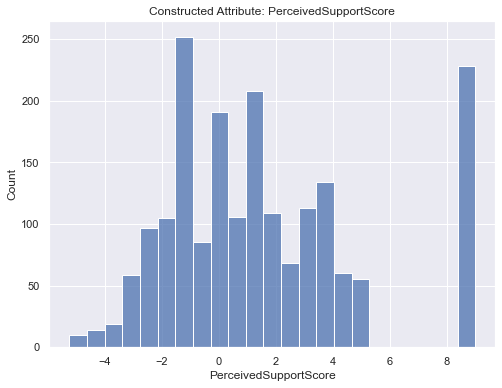

In [105]:
plt.figure(figsize=(8,6))
sns.histplot(x="PerceivedSupportScore",data=in_df)
plt.title('Constructed Attribute: PerceivedSupportScore')
plt.show()

In [106]:
in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SupportQ1              1913 non-null   object 
 1   SupportQ2              1913 non-null   object 
 2   SupportQ3              1913 non-null   object 
 3   SupportQ4              1913 non-null   object 
 4   SupportQ5              1913 non-null   object 
 5   AttitudeQ1             1685 non-null   object 
 6   AttitudeQ2             1685 non-null   object 
 7   AttitudeQ3             1913 non-null   object 
 8   Age                    1909 non-null   float64
 9   Gender                 1903 non-null   object 
 10  MentalIlness           1377 non-null   object 
 11  Treatment              1913 non-null   object 
 12  Year                   1913 non-null   int64  
 13  PerceivedSupportScore  1913 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 209.4+

The 228 missing values in attributes *SupportQ1* through *SupportQ5* are of MAR type. These missing MAR values showed a relationship with the Age attribute. As for answering AQ3, we need to visualize the relationship between the newly constructed attribute and the Mental Illness and Treatment attributes; we can adapt the approach of "leaving as is" for these missing values. The reason is that neither the Mental Illness attribute nor the Treatment attribute influenced the missing values on the ingredient attributes. 

Before doing the visualization, as the newly constructed attribute is numerical and both Mental Illness and Treatment are categorical, we need to first discretize the attribute. Scores higher than 1 were labeled as **Supportive** and scores lower than -0.5 were labeled as **Unsupportive**. 

In [107]:
def SupportiveOrNot(v):
    if(v>1 and v<9):
        return('Supportive')
    elif(v<-0.5):
        return('Unsupprotive')
    elif(v==9):
        return('Unknown')
    else:
        return('Neutral')

In [108]:
in_df['perceivedSupportGroup'] = in_df.PerceivedSupportScore.apply(SupportiveOrNot)

In [109]:
in_df.perceivedSupportGroup.value_counts()

Supportive      593
Unsupprotive    556
Neutral         536
Unknown         228
Name: perceivedSupportGroup, dtype: int64

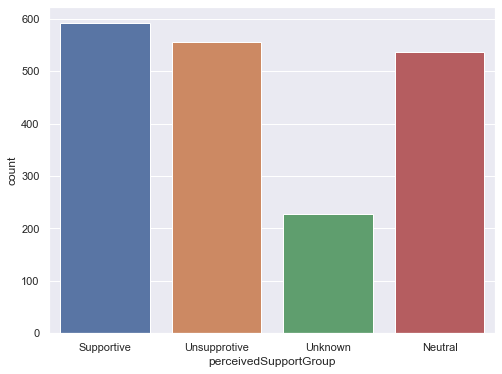

In [110]:
plt.figure(figsize=(8,6))
sns.countplot(x=in_df.perceivedSupportGroup)
plt.show()

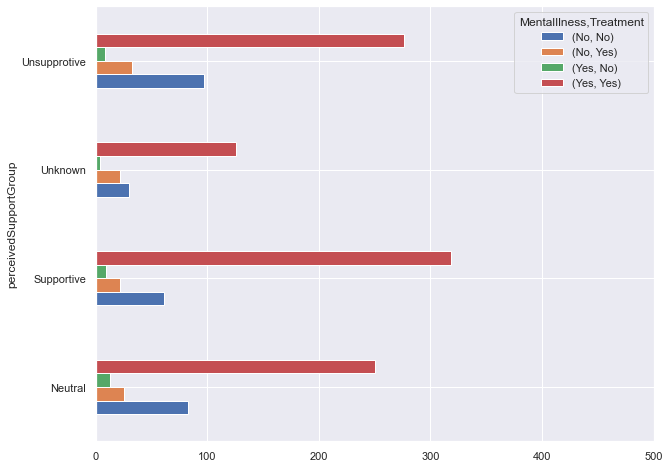

In [111]:
in_df.groupby(['perceivedSupportGroup', 'Treatment', 'MentalIlness']).size().unstack().unstack().plot.barh(xlim=[0,500],figsize=(10,8))

plt.savefig('./visuals/AQ3.png', dpi=1000,bbox_inches='tight')
plt.show()

In [112]:
BM = (in_df.perceivedSupportGroup == 'Neutral') | (in_df.perceivedSupportGroup == 'Unknown')
wdf = in_df[~BM]

<AxesSubplot:ylabel='perceivedSupportGroup'>

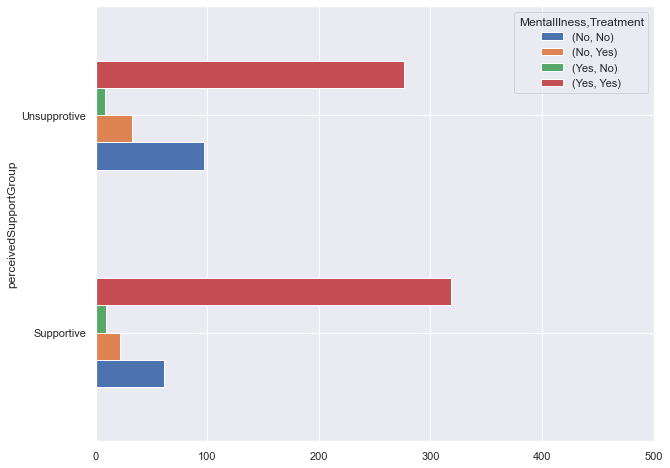

In [113]:
wdf.groupby(['perceivedSupportGroup', 'Treatment', 'MentalIlness']).size().unstack().unstack().plot.barh(xlim=[0,500],figsize=(10,8))

Studying the patterns shown in the preceding figure, we realize that perceivedSupportScore influences the employee's behavior in seeking professional help for mental health concerns. The number of respondents that have answered *Yes* to both *Have you ever been diagnosed with a mental health disorder?* and *Have you ever sought treatment for a mental health disorder from a mental health professional?* questions is significantly higher in the Supportive category. Likewise, the number of respondents that have answered *No* to both questions is significantly lower in the Supportive category.

Based on these observations, we can recommend investing in creating trust and employees' perception of support in tech companies.


## AQ4 – does the attitude of individuals toward mental health influence their mental health and their seeking of treatments?


In [114]:
Column_dict

{'SupportQ1': 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'SupportQ2': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'SupportQ3': 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
 'SupportQ4': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'SupportQ5': 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'AttitudeQ1': 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
 'AttitudeQ2': 'Would you feel comfortable discussing a mental health issue with your coworkers?',
 'AttitudeQ3': 'How willing would you be to share with friends and family that you have a mental illness

In [115]:
in_df.AttitudeQ1.value_counts()

Yes      658
Maybe    565
No       462
Name: AttitudeQ1, dtype: int64

In [116]:
in_df.AttitudeQ2.value_counts()

Maybe    750
No       476
Yes      459
Name: AttitudeQ2, dtype: int64

In [117]:
in_df.AttitudeQ3.value_counts()

Somewhat open                                            829
Very open                                                446
Somewhat not open                                        286
Neutral                                                  193
Not open at all                                           99
Not applicable to me (I do not have a mental illness)     60
Name: AttitudeQ3, dtype: int64

Similar to AQ3, to answer this question, we first need to construct a new attribute; **AttitudeScore** will be a column that indicates the participant's attitude toward sharing mental health issues. 

The *AttitudeQ1, AttitudeQ2,* and *AttitudeQ3* attributes are used to construct **AttitudeScore**. The +1 or +0.5 values were added to **AttitudeScore** where the answers to these attributes indicated openness, whereas the -1 or -0.5 values were subtracted from **AttitudeScore** where the answers to these attributes indicated a lack of openness. 

For instance, for *AttitudeQ3*, the +1, +0.5, -0.5, and -1 values were added/subtracted respectively for *Very open, Somewhat open, Somewhat not open,* and *Not open at all*; the question that *AttitudeQ3* asked was *Would you feel comfortable discussing a mental health issue with your coworkers?*


In [118]:
in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SupportQ1              1913 non-null   object 
 1   SupportQ2              1913 non-null   object 
 2   SupportQ3              1913 non-null   object 
 3   SupportQ4              1913 non-null   object 
 4   SupportQ5              1913 non-null   object 
 5   AttitudeQ1             1685 non-null   object 
 6   AttitudeQ2             1685 non-null   object 
 7   AttitudeQ3             1913 non-null   object 
 8   Age                    1909 non-null   float64
 9   Gender                 1903 non-null   object 
 10  MentalIlness           1377 non-null   object 
 11  Treatment              1913 non-null   object 
 12  Year                   1913 non-null   int64  
 13  PerceivedSupportScore  1913 non-null   float64
 14  perceivedSupportGroup  1913 non-null   object 
dtypes: f

I will first exlude the missing values in **AttitudeQ1** and **AttitudeQ2** from the **AttitudeScore** calculation.

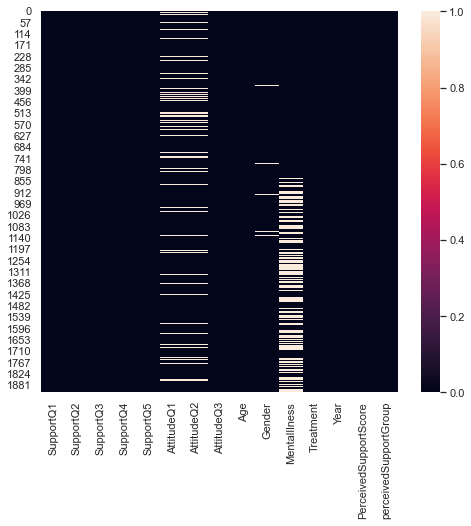

In [119]:
# Do AttitudeQ1 and AttitudeQ2 have missing values for the same dataobjects?
plt.figure(figsize=(8,7))
sns.heatmap(in_df.isna())
plt.show()

In [120]:
# filling the missing values in the supportQ1 to SupportQ5 with the value 'Missing'
# to exclude them from the PerceivedSupportScore calculation
attitude_cols = ['AttitudeQ1', 'AttitudeQ2']
for col in attitude_cols:
    in_df[col].fillna('Missing', inplace=True)

In [121]:
def CalculateAttitudeScore(row):
    
    s = 0
    # changing np.nan in AttitudeQ1 and AttitudeQ2 to 'Missing'
    if row.AttitudeQ1 == 'Missing':
        s = 9
    # AttitudeQ1:
    if(row.AttitudeQ1 == 'Yes'):
        s = s +1
    if(row.AttitudeQ1 == 'No'):
        s = s -1
        
    # AttitudeQ2:
    if(row.AttitudeQ2 == 'Yes'):
        s = s +1
    if(row.AttitudeQ2 == 'No'):
        s = s -1
        
    # AttitudeQ3:
    if(row.AttitudeQ3 == 'Very open'):
        s = s +1
    if(row.AttitudeQ3 == 'Somewhat open'):
        s = s +0.5
    if(row.AttitudeQ3 == 'Somewhat not open'):
        s = s -0.5
    if(row.AttitudeQ3 == 'Not open at all'):
        s = s -1

    return s

In [122]:
in_df['AttitudeScore'] = in_df.apply(CalculateAttitudeScore, axis=1)

In [123]:
in_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SupportQ1              1913 non-null   object 
 1   SupportQ2              1913 non-null   object 
 2   SupportQ3              1913 non-null   object 
 3   SupportQ4              1913 non-null   object 
 4   SupportQ5              1913 non-null   object 
 5   AttitudeQ1             1913 non-null   object 
 6   AttitudeQ2             1913 non-null   object 
 7   AttitudeQ3             1913 non-null   object 
 8   Age                    1909 non-null   float64
 9   Gender                 1903 non-null   object 
 10  MentalIlness           1377 non-null   object 
 11  Treatment              1913 non-null   object 
 12  Year                   1913 non-null   int64  
 13  PerceivedSupportScore  1913 non-null   float64
 14  perceivedSupportGroup  1913 non-null   object 
 15  Atti

<AxesSubplot:xlabel='AttitudeScore', ylabel='Count'>

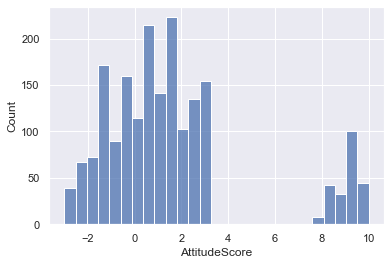

In [124]:
sns.histplot(x=in_df.AttitudeScore)

In [125]:
def OpenCloseAttitude(v):
    if(v>0.5 and v<6):
        return('OpenAttitude')
    elif(v<-0.5):
        return('CloseAttitude')
    elif(v>6):
        return('Unknown')
    else:
        return('Neutral')

In [126]:
in_df['attitudeGroup'] = in_df.AttitudeScore.apply(OpenCloseAttitude)

In [127]:
in_df['attitudeGroup'].value_counts()

OpenAttitude     756
Neutral          489
CloseAttitude    440
Unknown          228
Name: attitudeGroup, dtype: int64

<AxesSubplot:>

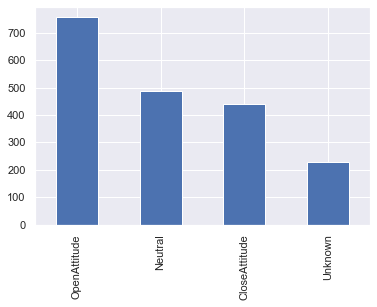

In [128]:
in_df['attitudeGroup'].value_counts().plot.bar()

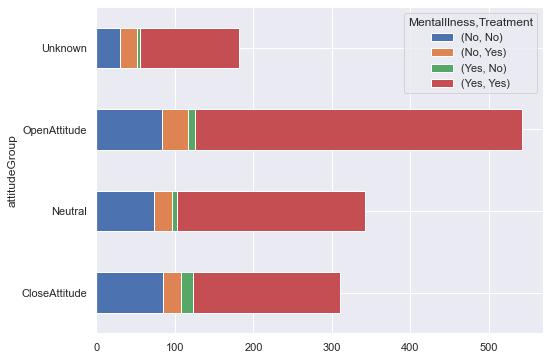

In [129]:
in_df.groupby(['attitudeGroup', 'Treatment','MentalIlness']).size().unstack().unstack().plot.barh(figsize=(8,6),stacked=True)
plt.savefig('./visuals/AQ4.png', dpi=1000,bbox_inches='tight')
plt.show()

The preceding visualization provides an answer for AQ4. There seems to be a meaningful improvement in employees seeking treatment if they have an open attitude toward sharing mental health issues. These observations suggest that tech companies should see the education of employees in their attitude toward mental health as a sensible investment option.


# END